<a href="https://colab.research.google.com/github/alexsouza1989/COVID-19_PROGNOSIS/blob/main/PRE_PREOCESSAMENTO_HSL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In [ ]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
import pandas as pd
import missingno as msno

In [ ]:
exames = pd.read_csv('/content/drive/MyDrive/SIRIO_LIBANES/HSL_Exames_4.csv', sep='|')
desfecho = pd.read_csv("/content/drive/MyDrive/SIRIO_LIBANES/HSL_Desfechos_4.csv", sep='|')
Pacientes = pd.read_csv("/content/drive/MyDrive/SIRIO_LIBANES/HSL_Pacientes_4.csv", sep='|')

In [ ]:
novo_sirio_pp = exames.merge(desfecho, on = ["ID_PACIENTE", "ID_ATENDIMENTO"], how = "left")
novo_sirio_pp = novo_sirio_pp.merge(Pacientes, on = ["ID_PACIENTE"], how = "left")

In [ ]:
novo_sirio_pp.to_csv('/content/drive/MyDrive/SIRIO_LIBANES/SIRIO_JUNTADO.csv', index=False)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip install pandas-profiling
!pip install --upgrade pandas-profiling

In [ ]:
my_report = sv.analyze(novo_sirio_pp)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


INICIO DAS CONVERSÕES E ANÁLISES

In [ ]:
#REMOVENDO ACENTOS - EXAMES
cols = exames.select_dtypes(include=[np.object]).columns
exames[cols] = exames[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))

#REMOVENDO ACENTOS - DESFECHO
cols_1 = desfecho.select_dtypes(include=[np.object]).columns
desfecho[cols_1] = desfecho[cols_1].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))

#REMOVENDO ACENTOS - PACIENTES
cols = Pacientes.select_dtypes(include=[np.object]).columns
Pacientes[cols] = Pacientes[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecat

In [ ]:
exames = exames.apply(lambda x: x.astype(str).str.upper())
desfecho = desfecho.apply(lambda x: x.astype(str).str.upper())
Pacientes = Pacientes.apply(lambda x: x.astype(str).str.upper())

In [ ]:
novo_sirio = exames.merge(desfecho, on = ["ID_PACIENTE", "ID_ATENDIMENTO"], how = "left")

In [ ]:
novo_sirio = novo_sirio.merge(Pacientes, on = ["ID_PACIENTE"], how = "left")

In [ ]:
novo_sirio = novo_sirio.replace('  ', ' ', regex=True)

In [ ]:
novo_sirio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2952999 entries, 0 to 2952998
Data columns (total 21 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   ID_PACIENTE          object
 1   ID_ATENDIMENTO       object
 2   DT_COLETA            object
 3   DE_ORIGEM            object
 4   DE_EXAME             object
 5   DE_ANALITO           object
 6   DE_RESULTADO         object
 7   CD_UNIDADE           object
 8   DE_VALOR_REFERENCIA  object
 9   DT_ATENDIMENTO       object
 10  DE_TIPO_ATENDIMENTO  object
 11  ID_CLINICA           object
 12  DE_CLINICA           object
 13  DT_DESFECHO          object
 14  DE_DESFECHO          object
 15  IC_SEXO              object
 16  AA_NASCIMENTO        object
 17  CD_PAIS              object
 18  CD_UF                object
 19  CD_MUNICIPIO         object
 20  CD_CEPREDUZIDO       object
dtypes: object(21)
memory usage: 495.7+ MB


In [ ]:
novo_sirio.to_csv('/content/drive/MyDrive/SIRIO_LIBANES/SIRIO_LIB_PADRONIZADO.csv', index=False)


In [ ]:
from collections import Counter
import collections

In [ ]:
novo_sirio['DE_ANALITO'].value_counts()

CREATININA             103471
HEMATOCRITO             63125
HEMOGLOBINA             63123
PLAQUETAS               59884
LEUCOCITOS              59057
                        ...  
MAG, IGM                    1
TS - 2A DET                 1
PH, FEZES                   1
VITAMINA B5                 1
RAST - WX5 - POLENS         1
Name: DE_ANALITO, Length: 1083, dtype: int64

In [ ]:
lista = novo_sirio['DE_ANALITO'].tolist()

In [ ]:
counts = collections.Counter(lista)
new_list = sorted(lista, key=lambda x: -counts[x])

In [ ]:
Counter(new_list)

In [ ]:
len(new_list)

2952999

In [ ]:
%matplotlib inline  

In [ ]:
# ANALITOS COM MAIS DE 18.000 ENTRADAS

lista_1 =['CREATININA','HEMATOCRITO','HEMOGLOBINA','PLAQUETAS','LEUCOCITOS','ERITROCITOS',
'VCM','RDW','EOSINOFILOS', 'EOSINOFILOS (%)', 'MONOCITOS', 'BASOFILOS', 'NEUTROFILOS (%)',
'NEUTROFILOS','MONOCITOS (%)','LINFOCITOS (%)','BASOFILOS (%)','LINFOCITOS','HCM',
'CHCM', 'MORFOLOGIA, SVE','MORFOLOGIA, SB', 'VOLUME PLAQUETARIO MEDIO','PROTEINA C-REATIVA',
'UREIA','CALCULO P/AFRODESCENDENTE MDRD', 'CALCULO P/NAO AFRODESCENDENTE CKD-EPI', 'CALCULO P/AFRODESCENDENTE CKD-EPI',
'CALCULO P/NAO AFRODESCENDENTE MDRD','POTASSIO','SODIO','MAGNESIO','DIMEROS D, QUANT','CALCIO IONIZAVEL',
'ALT (TGP)','HCO3 VENOSO','PH VENOSO','BE VENOSO','SAT O2 VENOSO','PO2 VENOSO','PCO2 VENOSO','AST (TGO)',
'FOSFORO', 'TTPA', 'TTPA-NORMAL DO DIA', 'SAT O2 ARTERIAL', 'BE ARTERIAL','HCO3 ARTERIAL','PCO2 ARTERIAL','PO2 ARTERIAL',
'PH ARTERIAL','TTPA - PACIENTE/NORMAL']

In [ ]:
len(lista_1)

52

In [ ]:
# ANALITOS COM MAIS DE 8000 ENTRADAS
lista_2 =['CREATININA','HEMATOCRITO','HEMOGLOBINA','PLAQUETAS','LEUCOCITOS','ERITROCITOS',
'VCM','RDW','EOSINOFILOS', 'EOSINOFILOS (%)', 'MONOCITOS', 'BASOFILOS', 'NEUTROFILOS (%)',
'NEUTROFILOS','MONOCITOS (%)','LINFOCITOS (%)','BASOFILOS (%)','LINFOCITOS','HCM',
'CHCM', 'MORFOLOGIA, SVE','MORFOLOGIA, SB', 'VOLUME PLAQUETARIO MEDIO','PROTEINA C-REATIVA',
'UREIA','CALCULO P/AFRODESCENDENTE MDRD', 'CALCULO P/NAO AFRODESCENDENTE CKD-EPI', 'CALCULO P/AFRODESCENDENTE CKD-EPI',
'CALCULO P/NAO AFRODESCENDENTE MDRD','POTASSIO','SODIO','MAGNESIO','DIMEROS D, QUANT','CALCIO IONIZAVEL',
'ALT (TGP)','HCO3 VENOSO','PH VENOSO','BE VENOSO','SAT O2 VENOSO','PO2 VENOSO','PCO2 VENOSO','AST (TGO)',
'FOSFORO', 'TTPA', 'TTPA-NORMAL DO DIA', 'SAT O2 ARTERIAL', 'BE ARTERIAL','HCO3 ARTERIAL','PCO2 ARTERIAL','PO2 ARTERIAL',
'PH ARTERIAL','TTPA - PACIENTE/NORMAL','BILIRRUBINA INDIRETA','BILIRRUBINA TOTAL','BILIRRUBINA DIRETA','FIBRINOGENIO','TEMPO DE PROTROMBINA',
'TP/INR','GAMA-GT','LACTATO, PLASMA','FOSFATASE ALCALINA','LACTATO, SANGUE',
'BASTONETES', 'SEGMENTADOS (%)','SEGMENTADOS','BASTONETES (%)','GLICOSE','DHL','DHL - IFCC', 'METAMIELOCITOS','METAMIELOCITOS (%)']

In [ ]:
len(lista_2)

71

In [ ]:
# ANALITOS COM MAIS 1000 ENTRADAS

lista_3=['CREATININA','HEMATOCRITO','HEMOGLOBINA','PLAQUETAS','LEUCOCITOS','ERITROCITOS',
'VCM','RDW','EOSINOFILOS', 'EOSINOFILOS (%)', 'MONOCITOS', 'BASOFILOS', 'NEUTROFILOS (%)',
'NEUTROFILOS','MONOCITOS (%)','LINFOCITOS (%)','BASOFILOS (%)','LINFOCITOS','HCM',
'CHCM', 'MORFOLOGIA, SVE','MORFOLOGIA, SB', 'VOLUME PLAQUETARIO MEDIO','PROTEINA C-REATIVA',
'UREIA','CALCULO P/AFRODESCENDENTE MDRD', 'CALCULO P/NAO AFRODESCENDENTE CKD-EPI', 'CALCULO P/AFRODESCENDENTE CKD-EPI',
'CALCULO P/NAO AFRODESCENDENTE MDRD','POTASSIO','SODIO','MAGNESIO','DIMEROS D, QUANT','CALCIO IONIZAVEL',
'ALT (TGP)','HCO3 VENOSO','PH VENOSO','BE VENOSO','SAT O2 VENOSO','PO2 VENOSO','PCO2 VENOSO','AST (TGO)',
'FOSFORO', 'TTPA', 'TTPA-NORMAL DO DIA', 'SAT O2 ARTERIAL', 'BE ARTERIAL','HCO3 ARTERIAL','PCO2 ARTERIAL','PO2 ARTERIAL',
'PH ARTERIAL','TTPA - PACIENTE/NORMAL','BILIRRUBINA INDIRETA','BILIRRUBINA TOTAL','BILIRRUBINA DIRETA','FIBRINOGENIO','TEMPO DE PROTROMBINA',
'TP/INR','GAMA-GT','LACTATO, PLASMA','FOSFATASE ALCALINA','DETECCAO DE CORONAVIRUS (NCOV-2019) POR PCR (ANATOMIA PATOLOGICA)','LACTATO, SANGUE',
'BASTONETES', 'SEGMENTADOS (%)','SEGMENTADOS','BASTONETES (%)','GLICOSE','DHL','DHL - IFCC', 'METAMIELOCITOS','METAMIELOCITOS (%)',
'LEUCOCITOS, URINA','ERITROCITOS, URINA','DENSIDADE, URINA','PH, URINA','CILINDROS, URINA','NITRITO, URINA','PROTEINAS, URINA ISOLADA',
'ASPECTO, URINA','COR, URINA', 'GLICOSE, URINA ISOL','MIELOCITOS (%)','MIELOCITOS','TROPONINA','C.CETONICOS, URINA','BILIRRUBINA,URINA',
'UROBILINOGENIO,URINA', 'CELULAS EPITELIAIS', 'CK','BNP','FRACAO IMATURA DE PLAQUETAS','CULTURA DE URINA','FERRITINA','T4 LIVRE','TRIGLICERIDES',
'CALCIO IONIZADO, POS FILTRO','COLESTEROL TOTAL','HDL-COLESTEROL','POTASSIO, SANGUE TOTAL','PROCALCITONINA','LDL COLESTEROL','URINA, CULTURA - JATO MEDIO - PARCIAL',
'CALCIO IONIZADO, SANGUE','CLORO','CLORO, SANGUE','POTASSIO, SANGUE','SODIO, SANGUE','CALCIO IONIZADO,ARTE','HEMOGLOBINA GLICADA',
'183','CLORO, ARTERIAL','CALCIO','HEMOCULTURA PARA AEROBIOS, POR MALDI-TOF, VARIOS MATERIAIS','TSH','HEMOCULTURA PARA ANAEROBIOS, POR MALDI-TOF, VARIOS MATERIAIS',
'25OH-VITAMINA D TOTAL','ALBUMINA','FERRO','HEMOCULTURA PARA FUNGOS, POR MALDI-TOF, VARIOS MATERIAIS',
'LIPASE','ACIDO URICO','VITAMINA B-12', 'GLICOSE, ARTERIAL', 'PROTEINAS', 'V-COLESTEROL', 'HORMONIO TIROESTIMULANTE',
'VHS', 'INFLUENZA A E B - TESTE RAPIDO', 'COLESTEROL NAO-HDL, SORO', 'VLDL-COLESTEROL', 'CK-MB', 'PSA TOTAL', 'HEMOCULTURA PARA AEROBIOS, POR MALDI-TOF, VARIOS MATERIAIS - PARCIAL',
'DISMORFISMO, URINA', 'HEMOCULTURA PARA ANAEROBIOS, POR MALDI-TOF, VARIOS MATERIAIS - PARCIAL',
'VANCOMICINA', 'SIDEROFILINA', 'FERRO GRAU SATURACAO', 'ACIDO FOLICO', 'ANTI-HCV', 'ANTI-HBS', 'TESTOSTERONA', 'HEPAR. BAIXO PESO MOL ANTI-XA',
'AGHBS', 'PROMIELOCITOS', 'PROMIELOCITOS (%)', 'SHBG', 'TTPA-PACIENTE/NORMAL', 'CULTURA QUANTITATIVA', 'CULTURA QUANTITATIVA - PARCIAL', 
'TESTOSTERONA LIVRE', 'FSH', 'INSULINA', 'HOMA-IR', 'ANTI-HBC TOTAL', 'OBSERVACAO', 'LH', 'IMC - INDICE DE MASSA CORPORAL', 'PTH', 'ANTI-HBC, IGM',
'CEA', 'ESTRADIOL', 'PSA LIVRE', 'PSA LIVRE/TOTAL', 'T3','GLOBULINAS']

In [ ]:
len(lista_3)

167

In [ ]:
#SELECIONADO PACIENTES EM DATASETE COM EXAMES ACIMA DE 8000 ENTRADAS
df_1 = novo_sirio.loc[novo_sirio['DE_ANALITO'].isin(lista_1)]

ESTE É DATASET QUE SERÁ MANIPULADO

In [ ]:
df_1.to_csv('/content/drive/MyDrive/SIRIO_LIBANES/SIRIO_LIB_PADRONIZADO_52_ANALITOS.csv', index=False)


In [ ]:
df_1['DE_ANALITO'].value_counts()

In [ ]:
df_1['DE_ANALITO'].value_counts()

CREATININA                               103471
HEMATOCRITO                               63125
HEMOGLOBINA                               63123
PLAQUETAS                                 59884
LEUCOCITOS                                59057
VCM                                       59053
ERITROCITOS                               59053
RDW                                       58954
LINFOCITOS (%)                            58861
BASOFILOS                                 58861
MONOCITOS                                 58861
EOSINOFILOS (%)                           58861
EOSINOFILOS                               58861
MONOCITOS (%)                             58861
NEUTROFILOS                               58861
NEUTROFILOS (%)                           58861
BASOFILOS (%)                             58861
LINFOCITOS                                58861
HCM                                       58731
CHCM                                      58731
MORFOLOGIA, SVE                         

In [ ]:
#REMOVENDO COLUNAS DESNECESSÁRIAS PARA AM

df1_am= df_1.drop(columns=['DE_ORIGEM', 'DE_VALOR_REFERENCIA', 'DE_TIPO_ATENDIMENTO', 'ID_CLINICA',
                         'DE_CLINICA', "CD_PAIS", 'CD_UF', 'CD_MUNICIPIO', 'CD_CEPREDUZIDO'])

# REMOVENDO COLUNAS DESNECESSÁRIAS PARA ANÁLISE DE ANALITOS
df1_analitos = df_1.drop(columns=['DE_ORIGEM', 'DE_EXAME', 'DE_VALOR_REFERENCIA', 'DT_ATENDIMENTO','DE_TIPO_ATENDIMENTO', 'ID_CLINICA',
                         'DE_CLINICA', "CD_PAIS", 'CD_UF', 'CD_MUNICIPIO', 'CD_CEPREDUZIDO', 'DT_DESFECHO', 'DE_DESFECHO', 'IC_SEXO','AA_NASCIMENTO'])

In [ ]:
DF = df1_am.drop_duplicates()

In [ ]:
DF = DF.dropna()


In [ ]:
DF

ID_PACIENTE                    ID_ATENDIMENTO  \
6842     CD83F78DF69CEFB5320FD8AFB423E075  335D435FB583F1C8630658F08183C513   
6843     AF39CAC9D23814E160BD1CEA9BDD0983  7E662F496DEAEF5AA09E46AD3F71678C   
6844     A6258ACE1242DA49152BCB2387E1C8BE  3B92BDA6B6B55E840C9361B316BCA6D7   
6845     2B5366A7FB0082B81EB2DAEEA8301EB8  F9F47ECA9E0D65B6E1C8488ACAD3AB81   
6846     1C943F884CFA1C2A78793C56A8608F06  F64A8A978DA4B7BB2CDC105A86C0ECC1   
...                                   ...                               ...   
2942380  A5D964EDE0515C3D79E245D4A63CA838  BA572C60331C69EAC6303DC5F5C735D0   
2942381  A5D964EDE0515C3D79E245D4A63CA838  BA572C60331C69EAC6303DC5F5C735D0   
2942382  A5D964EDE0515C3D79E245D4A63CA838  BA572C60331C69EAC6303DC5F5C735D0   
2942383  A5D964EDE0515C3D79E245D4A63CA838  BA572C60331C69EAC6303DC5F5C735D0   
2942384  A5D964EDE0515C3D79E245D4A63CA838  BA572C60331C69EAC6303DC5F5C735D0   

         DT_COLETA             DE_EXAME       DE_ANALITO DE_RESULTADO  \
6842    2021-03-31  BICARBONATO, SANGUE      HCO3 VENOSO           25   
6843    2020-05-08  BICARBONATO, SANGUE      HCO3 VENOSO           24   
6844    2020-02-11  BICARBONATO, SANGUE      HCO3 VENOSO           25   
6845    2020-07-16  BICARBONATO, SANGUE      HCO3 VENOSO           27   
6846    2021-03-26  BICARBONATO, SANGUE      HCO3 VENOSO           25   
...            ...                  ...              ...          ...   
2942380 2020-04-15            HEMOGRAMA       LEUCOCITOS         4480   
2942381 2020-04-15            HEMOGRAMA  NEUTROFILOS (%)         63,9   
2942382 2020-04-15            HEMOGRAMA  EOSINOFILOS (%)          2,0   
2942383 2020-04-15            HEMOGRAMA    MONOCITOS (%)         10,7   
2942384 2020-04-15            HEMOGRAMA        PLAQUETAS       225000   

        CD_UNIDADE DT_ATENDIMENTO DT_DESFECHO            DE_DESFECHO IC_SEXO  \
6842        MMOL/L     2021-03-31  2021-03-31    ALTA ADMINISTRATIVA       F   
6843        MMOL/L     2020-04-08  2020-11-08  ALTA MEDICA MELHORADO       M   
6844        MMOL/L     2020-02-11  2020-02-11    ALTA ADMINISTRATIVA       F   
6845        MMOL/L     2020-07-16  2020-07-16    ALTA ADMINISTRATIVA       F   
6846        MMOL/L     2021-03-26  2021-03-26    ALTA ADMINISTRATIVA       F   
...            ...            ...         ...                    ...     ...   
2942380       /MM3     2020-04-15  2020-04-15    ALTA ADMINISTRATIVA       F   
2942381          -     2020-04-15  2020-04-15    ALTA ADMINISTRATIVA       F   
2942382          -     2020-04-15  2020-04-15    ALTA ADMINISTRATIVA       F   
2942383          -     2020-04-15  2020-04-15    ALTA ADMINISTRATIVA       F   
2942384       /MM3     2020-04-15  2020-04-15    ALTA ADMINISTRATIVA       F   

        AA_NASCIMENTO  DIAS_HOSPITAL  
6842             1962              0  
6843             1986            214  
6844             1972              0  
6845             1991              0  
6846             1988              0  
...               ...            ...  
2942380          1993              0  
2942381          1993              0  
2942382          1993              0  
2942383          1993              0  
2942384          1993              0  

[1804708 rows x 13 columns]

In [ ]:
DF['ID_PACIENTE'].value_counts()

31A00CB9CD9979AD9DFF546E1DA49842    10671
27321EC56C4B67ACBCE32BEA004EFB8C     7937
369C7BA557BDD9BD5A50EA5059A6C012     7614
1E59DBFAED087E285133AEA3200BB8B6     5801
3D9CA0E905163E9904D2F172E96AE8C8     5420
                                    ...  
60869E175878E4FBBF9F5F5C1EE7D691        1
3C492FE322B6D6AE7CB6159365217C39        1
90E52EA3377F468D68BE2DB428AAEB78        1
193715EA8E2C9E9C6B7050BA5845E419        1
E1B4A35658BC617F8FF6487A5B42A492        1
Name: ID_PACIENTE, Length: 8567, dtype: int64

**DETERMINANDO ESTADO DE GRVIDADE**

In [ ]:
DF = DF[DF.DT_COLETA != 'DDMMAA']  #Excluindo linhas DDMMAA
DF = DF[DF.DT_ATENDIMENTO != 'DDMMAA']  #Excluindo linhas DDMMAA
DF = DF[DF.DT_DESFECHO != 'DDMMAA']  #Excluindo linhas DDMMAA

In [ ]:
DF['DT_DESFECHO'] = pd.to_datetime(DF['DT_DESFECHO'])
DF['DT_ATENDIMENTO'] = pd.to_datetime(DF['DT_ATENDIMENTO'])
DF['DT_COLETA'] = pd.to_datetime(DF['DT_COLETA'])

In [ ]:
DF['DIAS_HOSPITAL'] = (DF['DT_DESFECHO']-DF['DT_ATENDIMENTO']).dt.days
DF["DIAS_HOSPITAL"] = DF["DIAS_HOSPITAL"].astype(str).astype(int)

In [ ]:
casos_graves = DF['DIAS_HOSPITAL']>=10   #Selecionando pacientes que ficaram internados 10 ou mais dias
casos_graves = DF[casos_graves]

In [ ]:
casos_não_graves = DF['DIAS_HOSPITAL'] <=10   #Selecionando pacientes que ficaram internados MENOS 10 dias
casos_não_graves = DF[casos_não_graves]

In [ ]:
casos_graves = casos_graves.drop_duplicates(['ID_PACIENTE'])   #Removendo linhas duplicadas
casos_não_graves = casos_não_graves.drop_duplicates(['ID_PACIENTE'])   #Removendo linhas duplicadas

In [ ]:
obitos = DF[DF['DE_DESFECHO'].str.contains("OBITO")]  #Selecionando pacientes que ficaram internados 10 ou mais dias
obitos = obitos.drop_duplicates(['ID_PACIENTE'], keep='first')   #Removendo linhas duplicadas

In [ ]:
obitos["GRAVIDADE"] = 0

In [ ]:
df1 = casos_não_graves.assign(GRAVIDADE=casos_não_graves.ID_PACIENTE.isin(casos_graves.ID_PACIENTE).astype(int))
df1["DIAS_HOSPITAL"] = df1["DIAS_HOSPITAL"].astype(str).astype(int)

In [ ]:
d = {1 : "GRAVE", 0: "NAO GRAVE"}
df1['GRAVIDADE'] = df1['GRAVIDADE'].map(d)
df1.head(10)


ID_PACIENTE                    ID_ATENDIMENTO  \
6842   CD83F78DF69CEFB5320FD8AFB423E075  335D435FB583F1C8630658F08183C513   
6844   A6258ACE1242DA49152BCB2387E1C8BE  3B92BDA6B6B55E840C9361B316BCA6D7   
6845   2B5366A7FB0082B81EB2DAEEA8301EB8  F9F47ECA9E0D65B6E1C8488ACAD3AB81   
6846   1C943F884CFA1C2A78793C56A8608F06  F64A8A978DA4B7BB2CDC105A86C0ECC1   
6847   EACD2EA6DA8329C02CA5EBFF5FDC8AAA  E97D529045F123DB7B4E56CDEC0337A9   
6848   AF39CAC9D23814E160BD1CEA9BDD0983  7107EAAF44EBBC823303B01FDB423CD7   
6852   8CF7322440B7C3FDDBCA988491762E43  4CB29E7219C9CE16408A5B4B94FFA794   
6865   DD26E48B46C219A3A248AAB7116A92FF  321EA306F60EEFFF37FB956F8F6BEA78   
13798  5598C2C0070F7C047987AAB3925F2D9C  9346DEB09B652452E73CA66EDCC04262   
13799  8E1090CD2C08406DEC73ACA46A6A2594  6E5B75E444A98B2859C081987A305C01   

       DT_COLETA             DE_EXAME   DE_ANALITO DE_RESULTADO CD_UNIDADE  \
6842  2021-03-31  BICARBONATO, SANGUE  HCO3 VENOSO           25     MMOL/L   
6844  2020-02-11  BICARBONATO, SANGUE  HCO3 VENOSO           25     MMOL/L   
6845  2020-07-16  BICARBONATO, SANGUE  HCO3 VENOSO           27     MMOL/L   
6846  2021-03-26  BICARBONATO, SANGUE  HCO3 VENOSO           25     MMOL/L   
6847  2020-08-10  BICARBONATO, SANGUE  HCO3 VENOSO           27     MMOL/L   
6848  2020-04-09  BICARBONATO, SANGUE  HCO3 VENOSO           23     MMOL/L   
6852  2020-11-30  BICARBONATO, SANGUE  HCO3 VENOSO           27     MMOL/L   
6865  2021-10-02  BICARBONATO, SANGUE  HCO3 VENOSO           27     MMOL/L   
13798 2021-03-18                  TGO    AST (TGO)           24        U/L   
13799 2021-05-31                  TGO    AST (TGO)           23        U/L   

      DT_ATENDIMENTO DT_DESFECHO            DE_DESFECHO IC_SEXO AA_NASCIMENTO  \
6842      2021-03-31  2021-03-31    ALTA ADMINISTRATIVA       F          1962   
6844      2020-02-11  2020-02-11    ALTA ADMINISTRATIVA       F          1972   
6845      2020-07-16  2020-07-16    ALTA ADMINISTRATIVA       F          1991   
6846      2021-03-26  2021-03-26    ALTA ADMINISTRATIVA       F          1988   
6847      2020-08-10  2020-08-10    ALTA ADMINISTRATIVA       M          1987   
6848      2020-04-09  2020-04-09    ALTA ADMINISTRATIVA       M          1986   
6852      2020-11-27  2020-02-12    ALTA ADMINISTRATIVA       F          1949   
6865      2021-10-02  2021-02-16    ALTA ADMINISTRATIVA       M          1968   
13798     2021-03-18  2021-03-20  ALTA MEDICA MELHORADO       F          1945   
13799     2021-05-31  2021-02-06  ALTA MEDICA MELHORADO       F          1959   

       DIAS_HOSPITAL  GRAVIDADE  
6842               0  NAO GRAVE  
6844               0  NAO GRAVE  
6845               0  NAO GRAVE  
6846               0  NAO GRAVE  
6847               0  NAO GRAVE  
6848               0      GRAVE  
6852            -289      GRAVE  
6865            -228      GRAVE  
13798              2      GRAVE  
13799           -114  NAO GRAVE

In [ ]:
df1["GRAVIDADE"].value_counts()

Series([], Name: GRAVIDADE, dtype: int64)

In [ ]:
df1.info()


In [ ]:
df1.head(2)

ID_PACIENTE                    ID_ATENDIMENTO  \
6842  CD83F78DF69CEFB5320FD8AFB423E075  335D435FB583F1C8630658F08183C513   
6843  AF39CAC9D23814E160BD1CEA9BDD0983  7E662F496DEAEF5AA09E46AD3F71678C   

       DT_COLETA             DE_EXAME   DE_ANALITO DE_RESULTADO CD_UNIDADE  \
6842  31/03/2021  BICARBONATO, SANGUE  HCO3 VENOSO           25     MMOL/L   
6843  05/08/2020  BICARBONATO, SANGUE  HCO3 VENOSO           24     MMOL/L   

     DT_ATENDIMENTO DT_DESFECHO            DE_DESFECHO IC_SEXO AA_NASCIMENTO  \
6842     31/03/2021  31/03/2021    ALTA ADMINISTRATIVA       F          1962   
6843     04/08/2020  11/08/2020  ALTA MEDICA MELHORADO       M          1986   

      GRAVIDADE  
6842          0  
6843          1

In [ ]:
obitos.head(2)

ID_PACIENTE                    ID_ATENDIMENTO  \
13800  28F9C842A22BCBE99DC2832C8617FE04  3C4E77F18B0404CA0371661088F3BA59   
13807  966F5B1255E6C2AFF91FBAD12D62D3DB  1129AE23E589D734F12F1C027564723A   

        DT_COLETA DE_EXAME DE_ANALITO DE_RESULTADO CD_UNIDADE DT_ATENDIMENTO  \
13800  20/03/2021      TGO  AST (TGO)           58        U/L     20/03/2021   
13807  23/02/2021      TGO  AST (TGO)           71        U/L     23/02/2021   

      DT_DESFECHO                                  DE_DESFECHO IC_SEXO  \
13800      DDMMAA  OBITO APOS 48HS DE INTERNACAO SEM NECROPSIA       F   
13807      DDMMAA  OBITO APOS 48HS DE INTERNACAO SEM NECROPSIA       F   

      AA_NASCIMENTO  GRAVIDADE  
13800          1943          0  
13807          1965          0

In [ ]:
DF_FINAL = pd.concat([df1, df1])


In [ ]:
DF_FINAL
DF_FINAL_1 = DF_FINAL.drop_duplicates(['ID_PACIENTE', 'ID_ATENDIMENTO'], keep='first')   #Removendo linhas duplicadas


In [ ]:
DF_FINAL = DF_FINAL.drop(columns=['DE_EXAME', 'DE_DESFECHO', 'DT_ATENDIMENTO'])


In [ ]:
AL7 = DF.groupby(['ID_PACIENTE','ID_ATENDIMENTO', 'DE_ANALITO', 'CD_UNIDADE', 'DT_DESFECHO', 'DE_DESFECHO', 'DE_EXAME']).agg({'DT_COLETA': ['max'], 'DE_RESULTADO' : ['last']}).reset_index()

In [ ]:
AL7.columns = ['ID_PACIENTE', 'ID_ATENDIMENTO', 'DE_ANALITO', 'CD_UNIDADE', 'DT_COLETA', 'DE_DESFECHO', 'DE_EXAME', 'DT_DESFECHO', 'DE_RESULTADO']

In [ ]:
AL7.to_csv('sirio_ap.csv')

In [ ]:
DF_2_AM = DF_FINAL.drop_duplicates()

In [ ]:
DF_2_AM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761328 entries, 6842 to 2942384
Data columns (total 11 columns):
 #   Column            Dtype         
---  ------            -----         
 0   ID_PACIENTE       object        
 1   ID_ATENDIMENTO    object        
 2   DT_COLETA         datetime64[ns]
 3   DE_ANALITO        object        
 4   DE_RESULTADO      object        
 5   CD_UNIDADE        object        
 6   DT_DESFECHO       datetime64[ns]
 7   IC_SEXO           object        
 8   AA_NASCIMENTO     object        
 9   DATA_NO_HOSPITAL  int64         
 10  GRAVIDADE         int64         
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 161.3+ MB


In [ ]:
AL8 = DF_2_AM.groupby(['ID_PACIENTE','ID_ATENDIMENTO', 'DE_ANALITO', 'CD_UNIDADE', 'DT_DESFECHO', 'IC_SEXO', 'AA_NASCIMENTO', 'GRAVIDADE']).agg({'DT_COLETA': ['max'], 'DE_RESULTADO' : ['last']}).reset_index()

In [ ]:
AL8

ID_PACIENTE                    ID_ATENDIMENTO  \
                                                                             
0       00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
1       00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
2       00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
3       00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
4       00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
...                                  ...                               ...   
646867  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  B05F8F677920E2F10BE02DC49FD72734   
646868  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  B05F8F677920E2F10BE02DC49FD72734   
646869  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  B05F8F677920E2F10BE02DC49FD72734   
646870  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  B05F8F677920E2F10BE02DC49FD72734   
646871  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  B05F8F677920E2F10BE02DC49FD72734   

                               DE_ANALITO CD_UNIDADE DT_DESFECHO IC_SEXO  \
                                                                           
0                               ALT (TGP)        U/L  2020-08-25       M   
1                               AST (TGO)        U/L  2020-08-25       M   
2                               BASOFILOS       /MM3  2020-08-25       M   
3                           BASOFILOS (%)          -  2020-08-25       M   
4       CALCULO P/AFRODESCENDENTE CKD-EPI  ML/MINUTO  2020-08-25       M   
...                                   ...        ...         ...     ...   
646867                 PROTEINA C-REATIVA      MG/DL  2020-07-21       F   
646868                                RDW          %  2020-07-21       F   
646869                              UREIA      MG/DL  2020-07-21       F   
646870                                VCM         FL  2020-07-21       F   
646871           VOLUME PLAQUETARIO MEDIO          %  2020-07-21       F   

       AA_NASCIMENTO GRAVIDADE  DT_COLETA   DE_RESULTADO  
                                      max           last  
0               1967         0 2020-08-25             26  
1               1967         0 2020-08-25             24  
2               1967         0 2020-08-25             40  
3               1967         0 2020-08-25            0,6  
4               1967         0 2020-08-25  SUPERIOR A 90  
...              ...       ...        ...            ...  
646867          1967         0 2020-07-21           0,93  
646868          1967         0 2020-07-21           16,5  
646869          1967         0 2020-07-21             23  
646870          1967         0 2020-07-21           82,2  
646871          1967         0 2020-07-21            9,7  

[646872 rows x 10 columns]

In [ ]:
AL8['GRAVIDADE'].value_counts()

0    403483
1    243389
Name: GRAVIDADE, dtype: int64

In [ ]:
AL8.to_csv('sirio_ap.csv')

In [ ]:
sirio_libanes = pd.read_csv('/content/drive/MyDrive/SIRIO_LIBANES/SIRIO_AM_LISTA_1.csv', sep=',')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,14,30,31,38,50,54,61,66,67) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
sirio_libanes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235061 entries, 0 to 235060
Data columns (total 68 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   ID_PACIENTE                                           235061 non-null  object 
 1   ID_ATENDIMENTO                                        235061 non-null  object 
 2   DT_COLETA                                             235061 non-null  object 
 3   CD_UNIDADE                                            235061 non-null  object 
 4   "ID_PACIENTE"                                         235061 non-null  object 
 5   ALT (TGP)|U/L                                         13539 non-null   object 
 6   AST (TGO)|U/L                                         13239 non-null   float64
 7   BASOFILOS|/MM3                                        19689 non-null   float64
 8   BASOFILOS (%)|-                             

In [ ]:
sirio_libanes

ID_PACIENTE                    ID_ATENDIMENTO  \
0       00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
1       00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
2       00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
3       00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
4       00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
...                                  ...                               ...   
235056  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  B05F8F677920E2F10BE02DC49FD72734   
235057  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  B05F8F677920E2F10BE02DC49FD72734   
235058  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  B05F8F677920E2F10BE02DC49FD72734   
235059  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  B05F8F677920E2F10BE02DC49FD72734   
235060  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  B05F8F677920E2F10BE02DC49FD72734   

         DT_COLETA   CD_UNIDADE "ID_PACIENTE" ALT (TGP)|U/L  AST (TGO)|U/L  \
0       2020-08-25          U/L   ID_PACIENTE          26.0           24.0   
1       2020-08-25         /MM3   ID_PACIENTE           NaN            NaN   
2       2020-08-25            -   ID_PACIENTE           NaN            NaN   
3       2020-08-25    ML/MINUTO   ID_PACIENTE           NaN            NaN   
4       2020-08-25         G/DL   ID_PACIENTE           NaN            NaN   
...            ...          ...           ...           ...            ...   
235056  2020-07-21        NG/ML   ID_PACIENTE           NaN            NaN   
235057  2020-07-21  MILHOES/MM3   ID_PACIENTE           NaN            NaN   
235058  2020-07-21           PG   ID_PACIENTE           NaN            NaN   
235059  2020-07-21            %   ID_PACIENTE           NaN            NaN   
235060  2020-07-21           FL   ID_PACIENTE           NaN            NaN   

        BASOFILOS|/MM3  BASOFILOS (%)|-  \
0                  NaN              NaN   
1                 40.0              NaN   
2                  NaN              0.6   
3                  NaN              NaN   
4                  NaN              NaN   
...                ...              ...   
235056             NaN              NaN   
235057             NaN              NaN   
235058             NaN              NaN   
235059             NaN              NaN   
235060             NaN              NaN   

       CALCULO P/AFRODESCENDENTE CKD-EPI|ML/MINUTO  ... PH VENOSO|-  \
0                                              NaN  ...         NaN   
1                                              NaN  ...         NaN   
2                                              NaN  ...         NaN   
3                                    SUPERIOR A 90  ...         NaN   
4                                              NaN  ...         NaN   
...                                            ...  ...         ...   
235056                                         NaN  ...         NaN   
235057                                         NaN  ...         NaN   
235058                                         NaN  ...         NaN   
235059                                         NaN  ...         NaN   
235060                                         NaN  ...         NaN   

       PO2 VENOSO|MMHG SAT O2 VENOSO|%  BE ARTERIAL|- HCO3 ARTERIAL|MMOL/L  \
0                  NaN             NaN            NaN                  NaN   
1                  NaN             NaN            NaN                  NaN   
2                  NaN             NaN            NaN                  NaN   
3                  NaN             NaN            NaN                  NaN   
4                  NaN             NaN            NaN                  NaN   
...                ...             ...            ...                  ...   
235056             NaN             NaN            NaN                  NaN   
235057             NaN             NaN            NaN                  NaN   
235058             NaN             NaN            NaN                  NaN   
23505

In [ ]:
sirio_libanes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235061 entries, 0 to 235060
Data columns (total 68 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   ID_PACIENTE                                           235061 non-null  object 
 1   ID_ATENDIMENTO                                        235061 non-null  object 
 2   DT_COLETA                                             235061 non-null  object 
 3   CD_UNIDADE                                            235061 non-null  object 
 4   "ID_PACIENTE"                                         235061 non-null  object 
 5   ALT (TGP)|U/L                                         13539 non-null   object 
 6   AST (TGO)|U/L                                         13239 non-null   float64
 7   BASOFILOS|/MM3                                        19689 non-null   float64
 8   BASOFILOS (%)|-                             

In [ ]:
import matplotlib.pyplot as plt

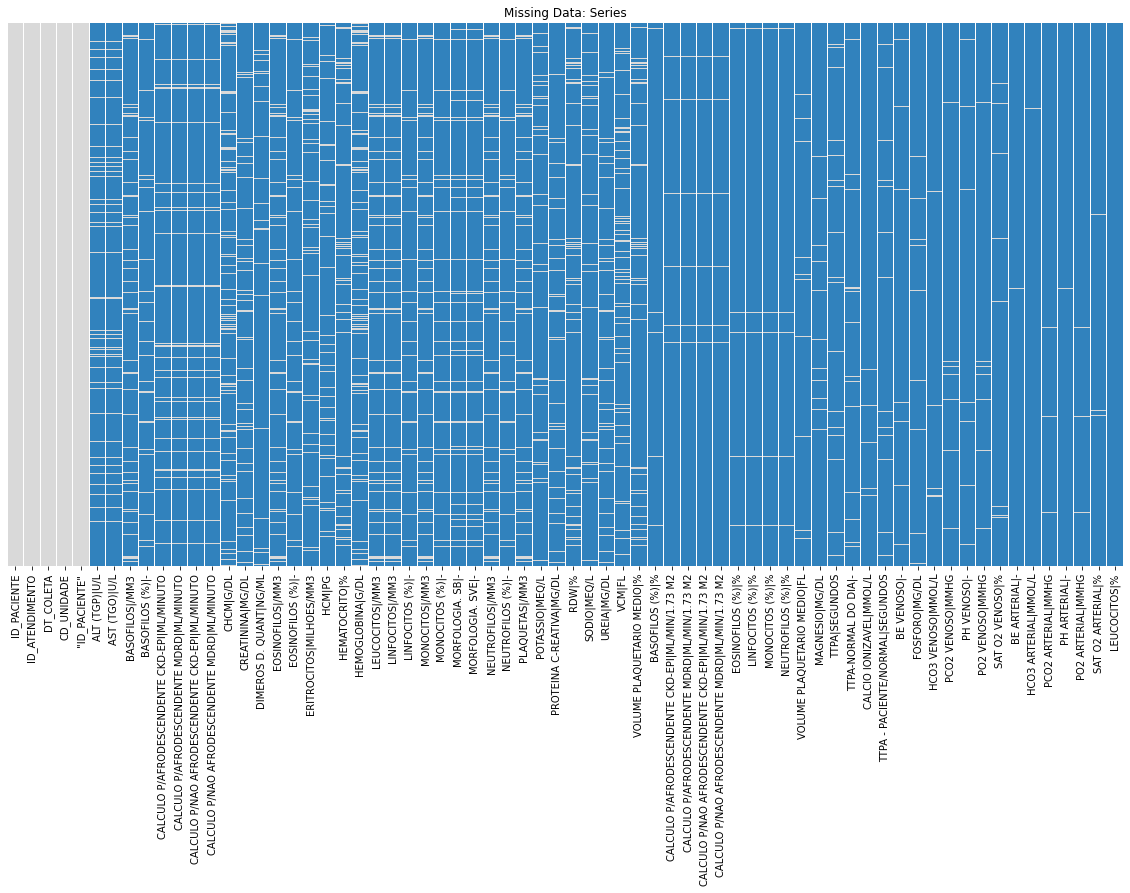

In [ ]:
plt.figure(figsize = (20,10)) # o que aparece em azul são valores ausentes

sns.heatmap(sirio_libanes.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')

plt.title('Missing Data: Series')
plt.show()

In [ ]:
sirio_libanes = pd.read_csv('/content/drive/MyDrive/SIRIO_LIBANES/SIRIO_AM_LISTA_1.csv', sep=',')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,14,30,31,38,50,54,61,66,67) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
sirio_libanes

In [ ]:
! pip install sweetviz

In [ ]:
import sweetviz as sv

In [ ]:
sirio_libanes['ALT (TGP)|U/L'] = pd.to_numeric(sirio_libanes['ALT (TGP)|U/L'], errors='coerce')
sirio_libanes['CREATININA|MG/DL'] = pd.to_numeric(sirio_libanes['CREATININA|MG/DL'], errors='coerce')
sirio_libanes['NEUTROFILOS (%)|-'] = pd.to_numeric(sirio_libanes['NEUTROFILOS (%)|-'], errors='coerce')
sirio_libanes['PLAQUETAS|/MM3'] = pd.to_numeric(sirio_libanes['PLAQUETAS|/MM3'], errors='coerce')
sirio_libanes['VOLUME PLAQUETARIO MEDIO|%'] = pd.to_numeric(sirio_libanes['VOLUME PLAQUETARIO MEDIO|%'], errors='coerce')
sirio_libanes['TTPA|SEGUNDOS'] = pd.to_numeric(sirio_libanes['TTPA|SEGUNDOS'], errors='coerce')
sirio_libanes['BE VENOSO|-'] = pd.to_numeric(sirio_libanes['BE VENOSO|-'], errors='coerce')
sirio_libanes['BE ARTERIAL|-'] = pd.to_numeric(sirio_libanes['BE ARTERIAL|-'], errors='coerce')
sirio_libanes['SAT O2 ARTERIAL|%'] = pd.to_numeric(sirio_libanes['SAT O2 ARTERIAL|%'], errors='coerce')
sirio_libanes['LEUCOCITOS|%'] = pd.to_numeric(sirio_libanes['LEUCOCITOS|%'], errors='coerce')

In [ ]:
sirio_libanes.info()

In [ ]:
sirio_libanes = sirio_libanes.drop(columns=['"ID_PACIENTE"', 'CD_UNIDADE'])


In [ ]:
sirio_libanes.to_csv('/content/drive/MyDrive/SIRIO_LIBANES/SIRIO_DF_52_ANALYTES.csv', index=False)

In [ ]:
sirio_libanes

ID_PACIENTE                    ID_ATENDIMENTO  \
0       00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
1       00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
2       00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
3       00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
4       00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
...                                  ...                               ...   
235056  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  B05F8F677920E2F10BE02DC49FD72734   
235057  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  B05F8F677920E2F10BE02DC49FD72734   
235058  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  B05F8F677920E2F10BE02DC49FD72734   
235059  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  B05F8F677920E2F10BE02DC49FD72734   
235060  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  B05F8F677920E2F10BE02DC49FD72734   

         DT_COLETA  ALT (TGP)|U/L  AST (TGO)|U/L  BASOFILOS|/MM3  \
0       2020-08-25           26.0           24.0             NaN   
1       2020-08-25            NaN            NaN            40.0   
2       2020-08-25            NaN            NaN             NaN   
3       2020-08-25            NaN            NaN             NaN   
4       2020-08-25            NaN            NaN             NaN   
...            ...            ...            ...             ...   
235056  2020-07-21            NaN            NaN             NaN   
235057  2020-07-21            NaN            NaN             NaN   
235058  2020-07-21            NaN            NaN             NaN   
235059  2020-07-21            NaN            NaN             NaN   
235060  2020-07-21            NaN            NaN             NaN   

        BASOFILOS (%)|- CALCULO P/AFRODESCENDENTE CKD-EPI|ML/MINUTO  \
0                   NaN                                         NaN   
1                   NaN                                         NaN   
2                   0.6                                         NaN   
3                   NaN                               SUPERIOR A 90   
4                   NaN                                         NaN   
...                 ...                                         ...   
235056              NaN                                         NaN   
235057              NaN                                         NaN   
235058              NaN                                         NaN   
235059              NaN                                         NaN   
235060              NaN                                         NaN   

       CALCULO P/AFRODESCENDENTE MDRD|ML/MINUTO  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                 SUPERIOR A 60   
4                                           NaN   
...                                         ...   
235056                                      NaN   
235057                                      NaN   
235058                                      NaN   
235059                                      NaN   
235060                                      NaN   

       CALCULO P/NAO AFRODESCENDENTE CKD-EPI|ML/MINUTO  ... PH VENOSO|-  \
0                                                  NaN  ...         NaN   
1                                                  NaN  ...         NaN   
2                                                  NaN  ...         NaN   
3                                                   84  ...         NaN   
4                                                  NaN  ...         NaN   
...                                                ...  ...         ...   
235056                                             NaN  ...         NaN   
235057                                             NaN  ...         NaN   
235058                                             NaN  ...         NaN   
235059                                             NaN  ...

In [ ]:
sirio_libanes['ID_ATENDIMENTO'].value_counts()

In [ ]:
report_sirio = sv.analyze(sirio_libanes)
report_sirio.show_html()

In [ ]:
sirio_libanes.isnull().sum()

ID_PACIENTE                0
ID_ATENDIMENTO             0
DT_COLETA                  0
ALT (TGP)|U/L         221529
AST (TGO)|U/L         221822
                       ...  
PCO2 ARTERIAL|MMHG    234265
PH ARTERIAL|-         234265
PO2 ARTERIAL|MMHG     234265
SAT O2 ARTERIAL|%     234266
LEUCOCITOS|%          235055
Length: 66, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
round(sirio_libanes.isnull().mean()*100,2) 


In [ ]:
sirio_libanes.info()

In [ ]:
percent_missing

6019.664682784469

In [ ]:
missing_values = sirio_libanes.isnull().sum() / len(sirio_libanes)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values

In [ ]:
missing_values = missing_values.to_frame()
missing_values.columns = ['NaN Values']
missing_values.index.names = ['Variables']
missing_values['Variables'] = missing_values.index



In [ ]:
sns.barplot(x = 'Variables', y = 'NaN Values', data=missing_values)

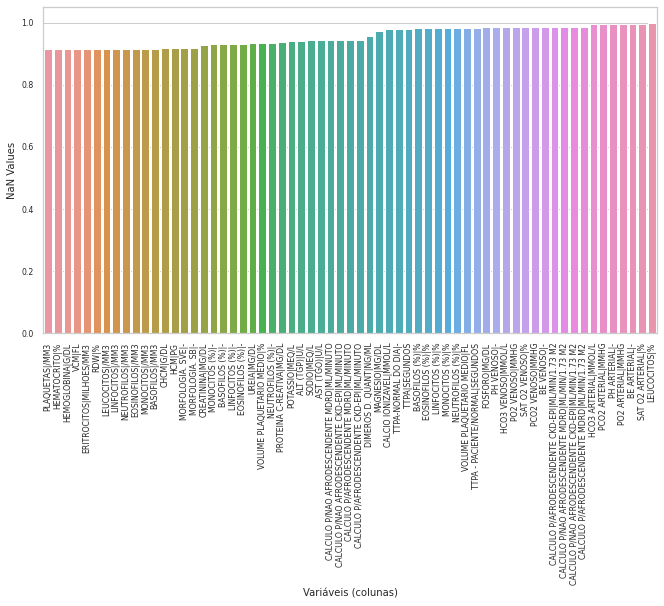

In [ ]:
plt.figure(figsize = (11,6))

sns.set(style="whitegrid", color_codes=True, font_scale=0.7)
sns.barplot(x = 'Variables', y = 'NaN Values', data=missing_values)
plt.xticks(rotation = 90)
plt.xlabel( "Variáveis (colunas)" , size = 10 ) 
plt.ylabel( "NaN Values" , size = 10 )
#plt.title( "Missing values for the dataset" , size = 8 ) 
#plt.savefig('VALORES_AUSENTES.png', format='png')
plt.show()


In [ ]:
percent_missing = sirio_libanes.isnull().sum() * 100 / len(sirio_libanes)
percent_missing.sort_values(inplace=True)

missing_value_df = pd.DataFrame({'Colunas': sirio_libanes.columns,
                                 'Valores ausentes (%)': percent_missing})

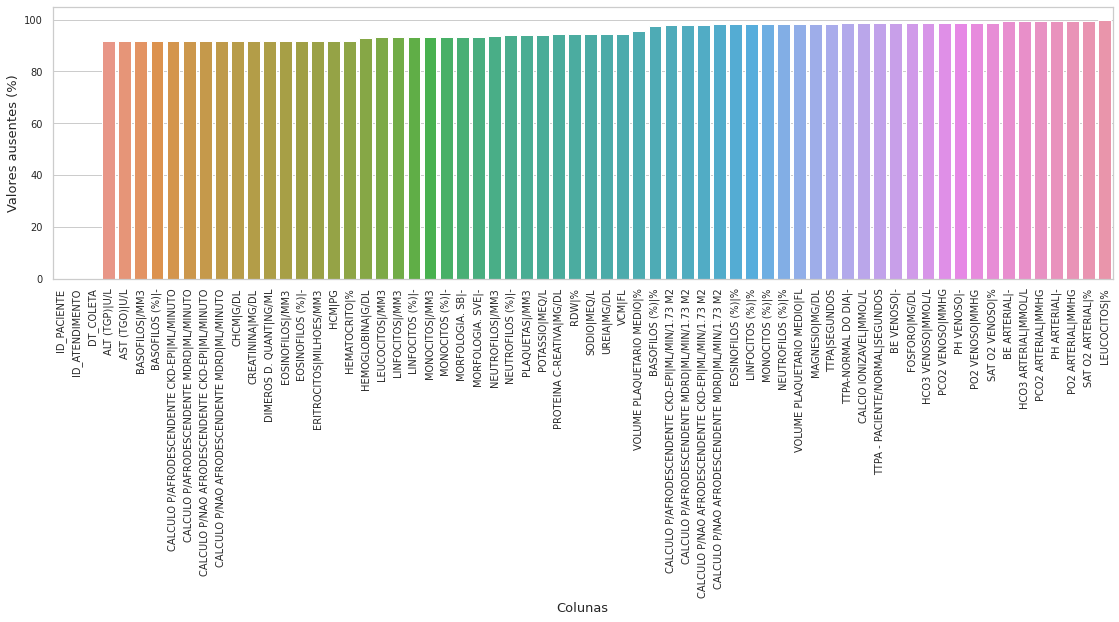

In [ ]:
plt.figure(figsize = (19,5))

sns.set(style="whitegrid", color_codes=False, font_scale=0.9)
sns.barplot(x = 'Colunas', y = 'Valores ausentes (%)', data=missing_value_df)
plt.xticks(rotation = 90)
plt.xlabel( "Colunas" , size = 13 ) 
plt.ylabel( "Valores ausentes (%)" , size = 13 )
#plt.title( "Missing values for the dataset" , size = 8 ) 
#plt.savefig('VALORES_AUSENTES.png', format='png')
#plt.tight_layout()
plt.show()

In [ ]:
sirio_libanes.to_csv('SIRIO_DF_52_ANALYTES.csv')

**JUNTANDO COLUNAS PARECIDAS EM UMA SÓ**


In [ ]:
cols = ['EOSINOFILOS (%)|-', 'EOSINOFILOS (%)|%']

In [ ]:
sirio_libanes['EOSINOFILOS|%']=np.where(sirio_libanes['EOSINOFILOS (%)|%'].notnull(), sirio_libanes['EOSINOFILOS (%)|-'], sirio_libanes['EOSINOFILOS (%)|-'])

In [ ]:
sirio_libanes['BASOFILOS|%']=np.where(sirio_libanes['BASOFILOS (%)|%'].notnull(), sirio_libanes['BASOFILOS (%)|-'], sirio_libanes['BASOFILOS (%)|-'])

In [ ]:
sirio_libanes['LINFOCITOS|%']=np.where(sirio_libanes['LINFOCITOS (%)|%'].notnull(), sirio_libanes['LINFOCITOS (%)|-'], sirio_libanes['LINFOCITOS (%)|-'])

In [ ]:
sirio_libanes['MONOCITOS|%']=np.where(sirio_libanes['MONOCITOS (%)|%'].notnull(), sirio_libanes['MONOCITOS (%)|-'], sirio_libanes['MONOCITOS (%)|-'])

In [ ]:
sirio_libanes['NEUTROFILOS|%']=np.where(sirio_libanes['NEUTROFILOS (%)|%'].notnull(), sirio_libanes['NEUTROFILOS (%)|-'], sirio_libanes['NEUTROFILOS (%)|-'])

In [ ]:
sirio_libanes = sirio_libanes.drop(columns=['EOSINOFILOS (%)|-', 'EOSINOFILOS (%)|%', 'EOSINOFILOS (%)|%', 'BASOFILOS (%)|-',
                                            'LINFOCITOS (%)|%','LINFOCITOS (%)|-', 'MONOCITOS (%)|%','MONOCITOS (%)|-',
                                            'NEUTROFILOS (%)|%','NEUTROFILOS (%)|-' ])


**CONVERSÃO DE COLUNAS QUE POSSUEM PARÂMETROS DE INFOERIOR E/OU SUPERIOR**

In [ ]:
sirio_libanes['CALCULO P/AFRODESCENDENTE CKD-EPI|ML/MINUTO'] = [str(x).replace('SUPERIOR A 90', '91') for x in sirio_libanes['CALCULO P/AFRODESCENDENTE CKD-EPI|ML/MINUTO']]  #tudo que superir a 90 considerei como 91
sirio_libanes['CALCULO P/AFRODESCENDENTE CKD-EPI|ML/MINUTO'] = sirio_libanes['CALCULO P/AFRODESCENDENTE CKD-EPI|ML/MINUTO'].astype(float)                   #  Convertendo a coluna  para numérico 

In [ ]:
sirio_libanes['CALCULO P/AFRODESCENDENTE MDRD|ML/MINUTO'] = [str(x).replace('SUPERIOR A 60', '61') for x in sirio_libanes['CALCULO P/AFRODESCENDENTE MDRD|ML/MINUTO']]  #tudo que superir a 90 considerei como 91
sirio_libanes['CALCULO P/AFRODESCENDENTE MDRD|ML/MINUTO'] = sirio_libanes['CALCULO P/AFRODESCENDENTE MDRD|ML/MINUTO'].astype(float)

In [ ]:
sirio_libanes['CALCULO P/NAO AFRODESCENDENTE CKD-EPI|ML/MINUTO'] = [str(x).replace('SUPERIOR A 90', '91') for x in sirio_libanes['CALCULO P/NAO AFRODESCENDENTE CKD-EPI|ML/MINUTO']]  #tudo que superir a 90 considerei como 91
sirio_libanes['CALCULO P/NAO AFRODESCENDENTE CKD-EPI|ML/MINUTO'] = sirio_libanes['CALCULO P/NAO AFRODESCENDENTE CKD-EPI|ML/MINUTO'].astype(float) 

In [ ]:
sirio_libanes['CALCULO P/NAO AFRODESCENDENTE MDRD|ML/MINUTO'] = [str(x).replace('SUPERIOR A 60', '61') for x in sirio_libanes['CALCULO P/NAO AFRODESCENDENTE MDRD|ML/MINUTO']]  #tudo que superir a 90 considerei como 91
sirio_libanes['CALCULO P/NAO AFRODESCENDENTE MDRD|ML/MINUTO'] = sirio_libanes['CALCULO P/NAO AFRODESCENDENTE MDRD|ML/MINUTO'].astype(float) 

In [ ]:
sirio_libanes['DIMEROS D. QUANT|NG/ML'] = [str(x).replace('INFERIOR A 215', '214') for x in sirio_libanes['DIMEROS D. QUANT|NG/ML']]
sirio_libanes['DIMEROS D. QUANT|NG/ML'] = [str(x).replace('SUPERIOR A 1000', '1000') for x in sirio_libanes['DIMEROS D. QUANT|NG/ML']]
sirio_libanes['DIMEROS D. QUANT|NG/ML'] = [str(x).replace('SUPERIOR A 128000', '128000') for x in sirio_libanes['DIMEROS D. QUANT|NG/ML']]  #tudo que superir a 90 considerei como 91
  #tudo que superir a 90 considerei como 91
sirio_libanes['DIMEROS D. QUANT|NG/ML'] = sirio_libanes['DIMEROS D. QUANT|NG/ML'].astype(float) 

In [ ]:
sirio_libanes['PROTEINA C-REATIVA|MG/DL'] = [str(x).replace('INFERIOR A 0.03', '0.02') for x in sirio_libanes['PROTEINA C-REATIVA|MG/DL']]  #tudo que superir a 90 considerei como 91
sirio_libanes['PROTEINA C-REATIVA|MG/DL'] = sirio_libanes['PROTEINA C-REATIVA|MG/DL'].astype(float) 

In [ ]:
sirio_libanes

ID_PACIENTE                    ID_ATENDIMENTO  \
0       00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
1       00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
2       00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
3       00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
4       00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
...                                  ...                               ...   
235056  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  B05F8F677920E2F10BE02DC49FD72734   
235057  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  B05F8F677920E2F10BE02DC49FD72734   
235058  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  B05F8F677920E2F10BE02DC49FD72734   
235059  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  B05F8F677920E2F10BE02DC49FD72734   
235060  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  B05F8F677920E2F10BE02DC49FD72734   

         DT_COLETA  ALT (TGP)|U/L  AST (TGO)|U/L  BASOFILOS|/MM3  \
0       2020-08-25           26.0           24.0             NaN   
1       2020-08-25            NaN            NaN            40.0   
2       2020-08-25            NaN            NaN             NaN   
3       2020-08-25            NaN            NaN             NaN   
4       2020-08-25            NaN            NaN             NaN   
...            ...            ...            ...             ...   
235056  2020-07-21            NaN            NaN             NaN   
235057  2020-07-21            NaN            NaN             NaN   
235058  2020-07-21            NaN            NaN             NaN   
235059  2020-07-21            NaN            NaN             NaN   
235060  2020-07-21            NaN            NaN             NaN   

        CALCULO P/AFRODESCENDENTE CKD-EPI|ML/MINUTO  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                              91.0   
4                                               NaN   
...                                             ...   
235056                                          NaN   
235057                                          NaN   
235058                                          NaN   
235059                                          NaN   
235060                                          NaN   

        CALCULO P/AFRODESCENDENTE MDRD|ML/MINUTO  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                           61.0   
4                                            NaN   
...                                          ...   
235056                                       NaN   
235057                                       NaN   
235058                                       NaN   
235059                                       NaN   
235060                                       NaN   

        CALCULO P/NAO AFRODESCENDENTE CKD-EPI|ML/MINUTO  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                  84.0   
4                                                   NaN   
...                                                 ...   
235056                                              NaN   
235057                                              NaN   
235058                                              NaN   
235059                                              NaN   
235060                                              NaN   

        CALCULO P/NAO AFRODESCENDENTE MDRD|ML/MINUTO  ...  PCO2 ARTERIAL|MMHG  \
0                                                NaN  ...                 NaN   
1                                                NaN  ...                 NaN   
2                                    

In [ ]:
REL = sv.analyze(sirio_libanes)
REL.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**RETIRANDO COLUNAS QUE POSSUEM MUITO TEXTO**

In [ ]:
sirio_libanes = sirio_libanes.drop(columns=['MORFOLOGIA. SB|-', 'MORFOLOGIA. SVE|-'])

In [ ]:
sirio_libanes.to_csv('/content/drive/MyDrive/SIRIO_LIBANES/SIRIO_DF_FINAL.csv', index=False)

In [ ]:
pd.to_numeric(sirio_libanes['PROTEINA C-REATIVA|MG/DL'])
pd.to_numeric(sirio_libanes['CALCULO P/AFRODESCENDENTE CKD-EPI|ML/MINUTO'])
pd.to_numeric(sirio_libanes['CALCULO P/AFRODESCENDENTE MDRD|ML/MINUTO'])
pd.to_numeric(sirio_libanes['CALCULO P/NAO AFRODESCENDENTE CKD-EPI|ML/MINUTO'])
pd.to_numeric(sirio_libanes['CALCULO P/NAO AFRODESCENDENTE MDRD|ML/MINUTO'])
pd.to_numeric(sirio_libanes['DIMEROS D. QUANT|NG/ML'])
pd.to_numeric(sirio_libanes['ERITROCITOS|MILHOES/MM3'])

In [ ]:
REL = sv.analyze(sirio_libanes)
REL.show_html()

In [ ]:
sirio_libanes.info()

In [ ]:
#escala média
dados_1 = sirio_libanes.loc[:,['ALT (TGP)|U/L', 'AST (TGO)|U/L', 'BASOFILOS|/MM3', 'CALCULO P/AFRODESCENDENTE CKD-EPI|ML/MINUTO',
                               'CALCULO P/AFRODESCENDENTE MDRD|ML/MINUTO', 'CALCULO P/NAO AFRODESCENDENTE CKD-EPI|ML/MINUTO',
                               'CALCULO P/NAO AFRODESCENDENTE MDRD|ML/MINUTO', 'EOSINOFILOS|/MM3',
                               'SODIO|MEQ/L', 'UREIA|MG/DL', 'PO2 VENOSO|MMHG','SAT O2 VENOSO|%', 
                               'PO2 ARTERIAL|MMHG', ]]


In [ ]:
#escala baixa
dados_2 = sirio_libanes.loc[:,['CHCM|G/DL', 'CREATININA|MG/DL', 'ERITROCITOS|MILHOES/MM3', 'HCM|PG',
                               'HEMATOCRITO|%', 'PROTEINA C-REATIVA|MG/DL', 'RDW|%',
                               'VOLUME PLAQUETARIO MEDIO|%','TTPA|SEGUNDOS',
                               'TTPA-NORMAL DO DIA|-', 'BE VENOSO|-', 'HCO3 VENOSO|MMOL/L', 'PCO2 VENOSO|MMHG',
                               'VCM|FL','BE ARTERIAL|-', 'HCO3 ARTERIAL|MMOL/L', 'PCO2 ARTERIAL|MMHG',
                               'SAT O2 ARTERIAL|%', 'LINFOCITOS|%', 'MONOCITOS|%', 'NEUTROFILOS|%']]


In [ ]:
#escala alta
dados_3 = sirio_libanes.loc[:,['ERITROCITOS|MILHOES/MM3', 'POTASSIO|MEQ/L','BASOFILOS (%)|%',
                               'MAGNESIO|MG/DL','CALCIO IONIZAVEL|MMOL/L', 'TTPA - PACIENTE/NORMAL|SEGUNDOS',
                               'FOSFORO|MG/DL', 'PH VENOSO|-','PH ARTERIAL|-', 'LEUCOCITOS|%',
                               'EOSINOFILOS|%', 'BASOFILOS|%',]]

dados_4 = sirio_libanes.loc[:,['LEUCOCITOS|/MM3', 'LINFOCITOS|/MM3', 'MONOCITOS|/MM3', 'NEUTROFILOS|/MM3',
                               'VOLUME PLAQUETARIO MEDIO|FL'
                               ]]

dados_5 = sirio_libanes.loc[:,['PLAQUETAS|/MM3']]


Parei no sódio

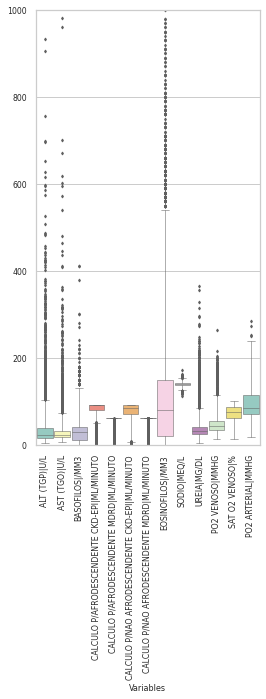

In [ ]:
plt.figure(figsize = (4,8))
plt.xticks(rotation = 90)
plt.xlabel( "Variables" , size = 8 ) 
#plt.title( "Boxplot para os valores" , size = 8 ) 
axes = plt.gca()
ymin=0
ymax=1000
axes.set_ylim([ymin,ymax])
ax = sns.boxplot(data=dados_1, orient="v", palette="Set3", width=0.9, linewidth=0.5, fliersize=2, whis=3)

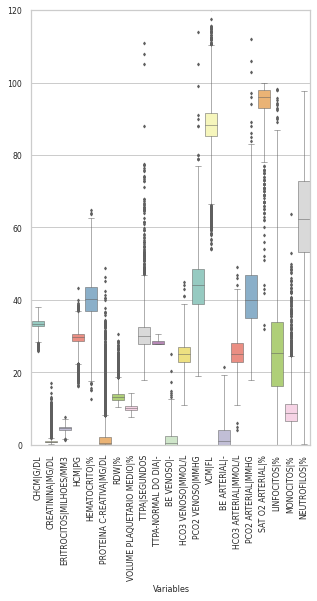

In [ ]:
plt.figure(figsize = (5,8))
plt.xticks(rotation = 90)
plt.xlabel( "Variables" , size = 8 ) 
#plt.title( "Boxplot para os valores" , size = 8 ) 
axes = plt.gca()
ymin=0
ymax=120
axes.set_ylim([ymin,ymax])
ax = sns.boxplot(data=dados_2, orient="v", palette="Set3", width=0.9, linewidth=0.5, fliersize=2, whis=3)

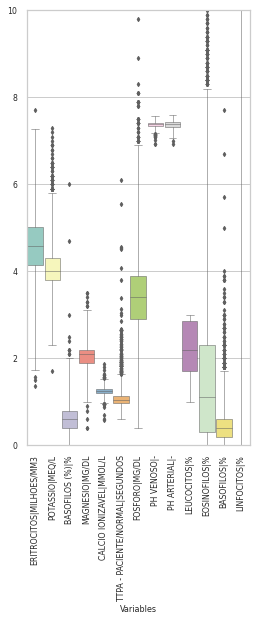

In [ ]:
plt.figure(figsize = (4,8))
plt.xticks(rotation = 90)
plt.xlabel( "Variables" , size = 8 ) 
#plt.title( "Boxplot para os valores" , size = 8 ) 
axes = plt.gca()
ymin=0
ymax=10
axes.set_ylim([ymin,ymax])
ax = sns.boxplot(data=dados_3, orient="v", palette="Set3", width=0.9, linewidth=0.5, fliersize=3, whis=3)

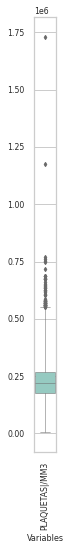

In [ ]:
plt.figure(figsize = (0.4,8))
plt.xticks(rotation = 90)
plt.xlabel( "Variables" , size = 8 ) 
#plt.title( "Boxplot para os valores" , size = 8 ) 
axes = plt.gca()
ymin=0
ymax=10
#axes.set_ylim([ymin,ymax])
ax = sns.boxplot(data=dados_5, orient="v", palette="Set3", width=0.9, linewidth=0.5, fliersize=3, whis=3)

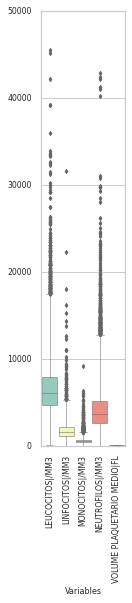

In [ ]:
plt.figure(figsize = (1.5,8))
plt.xticks(rotation = 90)
plt.xlabel( "Variables" , size = 8 ) 
#plt.title( "Boxplot para os valores" , size = 8 ) 
axes = plt.gca()
ymin=0
ymax=50000
axes.set_ylim([ymin,ymax])
ax = sns.boxplot(data=dados_4, orient="v", palette="Set3", width=0.9, linewidth=0.5, fliersize=3, whis=3)

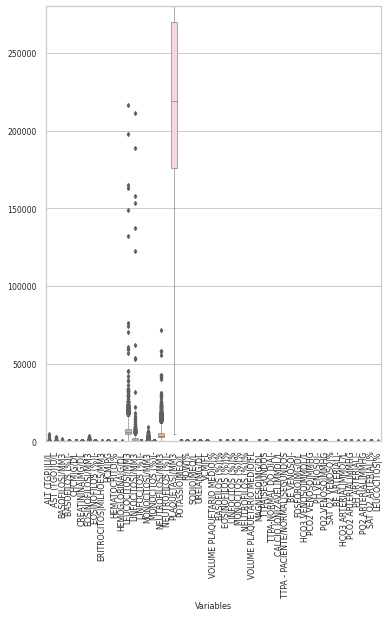

In [ ]:
plt.figure(figsize = (6,8))
plt.xticks(rotation = 90)
plt.xlabel( "Variables" , size = 8 ) 
#plt.title( "Boxplot para os valores" , size = 8 ) 
axes = plt.gca()
ymin=0
ymax=280000
axes.set_ylim([ymin,ymax])
ax = sns.boxplot(data=sirio_libanes, orient="v", palette="Set3", width=0.9, linewidth=0.5, fliersize=3, whis=3)




NOVA SELEÇÃO CONSIDERANDO APENAS OS EXAMES DE SANGUE

In [ ]:
exames = pd.read_csv('/content/drive/MyDrive/SIRIO_LIBANES/sirio_ap.csv', sep=',')

In [ ]:
exames

In [ ]:
hemograma = exames['DE_EXAME'] =='HEMOGRAMA'
hemograma = exames[hemograma]

In [ ]:
hemograma = hemograma.drop_duplicates()

In [ ]:
df_1 = hemograma.drop(columns=['Unnamed: 0', 'DT_DESFECHO','DE_EXAME', 'DE_DESFECHO'])

In [ ]:
df_1 = df_1.groupby(['ID_PACIENTE','ID_ATENDIMENTO', 'DE_ANALITO', 'CD_UNIDADE']).agg({'DT_COLETA': ['max'], 'DE_RESULTADO' : ['last']}).reset_index()

In [ ]:
df_1

ID_PACIENTE  ... DE_RESULTADO
                                          ...         last
0       00017961865C4F766FDBB3CD8FE0BFB0  ...           40
1       00017961865C4F766FDBB3CD8FE0BFB0  ...          0,6
2       00017961865C4F766FDBB3CD8FE0BFB0  ...         34,5
3       00017961865C4F766FDBB3CD8FE0BFB0  ...           60
4       00017961865C4F766FDBB3CD8FE0BFB0  ...          0,9
...                                  ...  ...          ...
342406  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  ...         72,2
342407  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  ...       315000
342408  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  ...         16,5
342409  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  ...         82,2
342410  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  ...          9,7

[342411 rows x 6 columns]

In [ ]:
df_1.columns = ['ID_PACIENTE', 'ID_ATENDIMENTO', 'DE_ANALITO', 'CD_UNIDADE', 'DT_COLETA', 'DE_RESULTADO']

In [ ]:
#df_1.to_csv('hemograma.csv')

**LENDO HEMOGRAMA PIVOTEADO**

In [ ]:
hemograma_piv = pd.read_csv('/content/drive/MyDrive/SIRIO_LIBANES/hemograma_pivoteado_sirio.csv', sep=',')

In [ ]:
hemograma_piv= hemograma_piv.drop(columns=['BASOFILOS (%)|%', 'EOSINOFILOS (%)|%','LINFOCITOS (%)|%', 'MONOCITOS (%)|%', 'NEUTROFILOS (%)|%', 'VOLUME PLAQUETARIO MEDIO|FL', '"ID_PACIENTE"'])

In [ ]:
hemograma_piv

In [ ]:
hemograma_piv.to_csv('HEMOGRAM_ANALYTES.csv', index=False)

In [ ]:
hemograma_piv= hemograma_piv.drop(columns=['MORFOLOGIA. SVE|-', 'MORFOLOGIA. SB|-'])

In [ ]:
import matplotlib.pyplot as plt

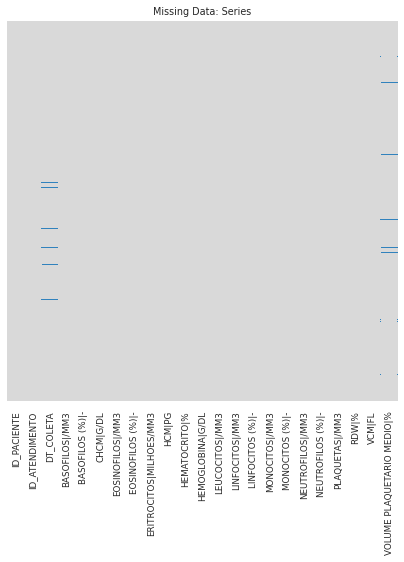

In [ ]:
plt.figure(figsize = (7,7)) # o que aparece em azul são valores ausentes
sns.heatmap(hemograma_piv.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Series')
plt.show()

In [ ]:
missing_values = hemograma_piv.isnull().sum() / len(hemograma_piv)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values

RDW|%                         0.000513
BASOFILOS|/MM3                0.001603
EOSINOFILOS|/MM3              0.001603
LINFOCITOS|/MM3               0.001603
MONOCITOS|/MM3                0.001603
NEUTROFILOS|/MM3              0.001603
BASOFILOS (%)|-               0.002116
EOSINOFILOS (%)|-             0.002116
LINFOCITOS (%)|-              0.002116
MONOCITOS (%)|-               0.002116
NEUTROFILOS (%)|-             0.002116
DT_COLETA                     0.012890
VOLUME PLAQUETARIO MEDIO|%    0.026805
dtype: float64

In [ ]:
missing_values = missing_values.to_frame()
missing_values.columns = ['NaN Values']
missing_values.index.names = ['Variables']
missing_values['Variables'] = missing_values.index

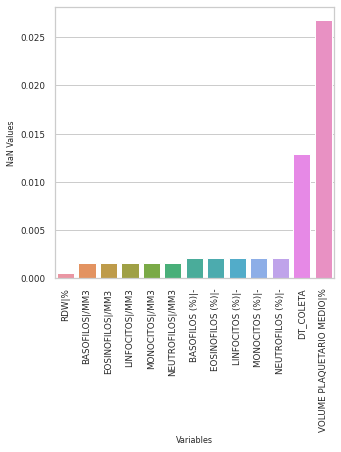

In [ ]:
plt.figure(figsize = (5,5))

sns.set(style="whitegrid", color_codes=True, font_scale=0.8)
sns.barplot(x = 'Variables', y = 'NaN Values', data=missing_values)
plt.xticks(rotation = 90)
plt.xlabel( "Variables" , size = 8 ) 
plt.ylabel( "NaN Values" , size = 8 )
#plt.title( "Missing values for the dataset" , size = 8 ) 
plt.savefig('VALORES_AUSENTES.png', format='pdf')
plt.show()

In [ ]:
percent_missing = hemograma_piv.isnull().sum() * 100 / len(hemograma_piv)
missing_value_df = pd.DataFrame({'Colunas': hemograma_piv.columns,
                                 'Valores ausentes (%)': percent_missing})

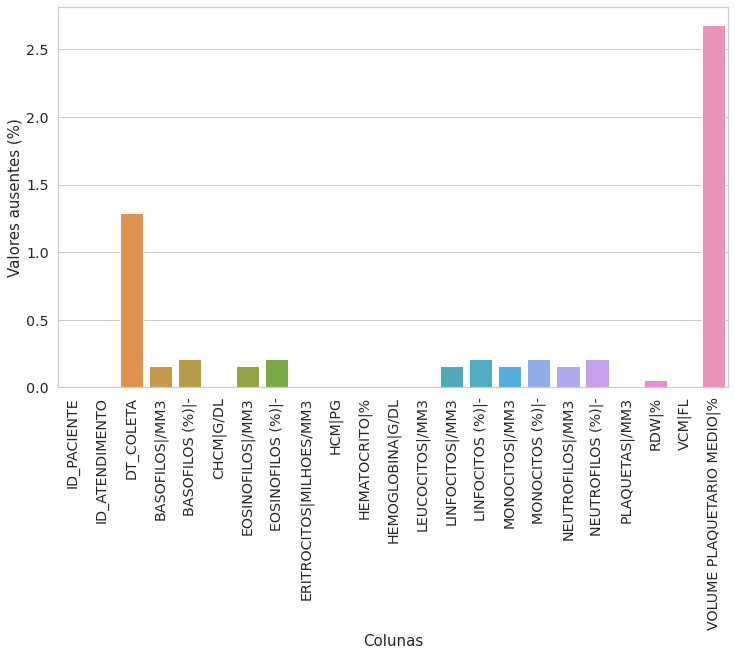

In [ ]:
plt.figure(figsize = (12,7))

sns.set(style="whitegrid", color_codes=True, font_scale=1.3)
sns.barplot(x = 'Colunas', y = 'Valores ausentes (%)', data=missing_value_df)
plt.xticks(rotation = 90)
plt.xlabel( "Colunas" , size = 15 ) 
plt.ylabel( "Valores ausentes (%)" , size = 15 )
#plt.title( "Missing values for the dataset" , size = 8 ) 
#plt.savefig('VALORES_AUSENTES.png', format='png')
#plt.tight_layout()
plt.show()

In [ ]:
hemograma_piv['PLAQUETAS|/MM3']= pd.to_numeric(hemograma_piv['PLAQUETAS|/MM3'], errors='coerce')

In [ ]:
hemograma_piv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15594 entries, 0 to 15593
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID_PACIENTE                 15594 non-null  object 
 1   ID_ATENDIMENTO              15594 non-null  object 
 2   DT_COLETA                   15393 non-null  object 
 3   BASOFILOS|/MM3              15569 non-null  float64
 4   BASOFILOS (%)|-             15561 non-null  float64
 5   CHCM|G/DL                   15594 non-null  float64
 6   EOSINOFILOS|/MM3            15569 non-null  float64
 7   EOSINOFILOS (%)|-           15561 non-null  float64
 8   ERITROCITOS|MILHOES/MM3     15594 non-null  float64
 9   HCM|PG                      15594 non-null  float64
 10  HEMATOCRITO|%               15594 non-null  float64
 11  HEMOGLOBINA|G/DL            15594 non-null  float64
 12  LEUCOCITOS|/MM3             15594 non-null  float64
 13  LINFOCITOS|/MM3             155

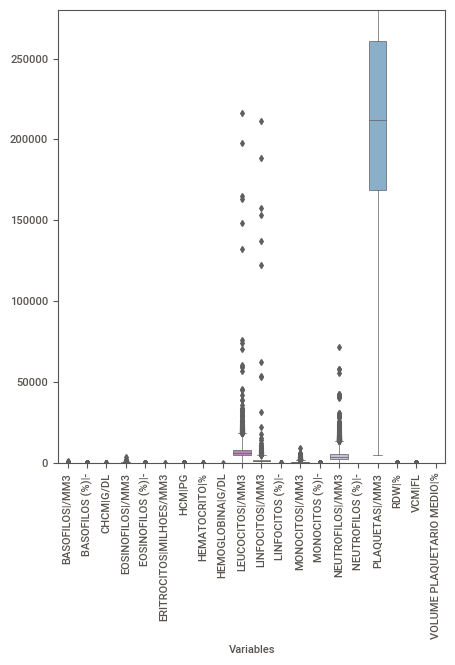

In [ ]:
plt.figure(figsize = (5,6))
plt.xticks(rotation = 90)
plt.xlabel( "Variables" , size = 8 ) 
#plt.title( "Boxplot para os valores" , size = 8 ) 
axes = plt.gca()
ymin=0
ymax=280000
axes.set_ylim([ymin,ymax])
ax = sns.boxplot(data=hemograma_piv, orient="v", palette="Set3", width=0.9, linewidth=0.5, fliersize=3, whis=3)

In [ ]:
#! pip install sweetviz

     |████████████████████████████████| 15.1 MB 4.2 MB/s 


APRENDIZADO DE MÁQUINA CONSIDERANDO APENAS OS EXAMES DE SANGUE

In [ ]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In [ ]:
exames = pd.read_csv('/content/drive/MyDrive/SIRIO_LIBANES/HSL_Exames_4.csv', sep='|')
desfecho = pd.read_csv("/content/drive/MyDrive/SIRIO_LIBANES/HSL_Desfechos_4.csv", sep='|')
Pacientes = pd.read_csv("/content/drive/MyDrive/SIRIO_LIBANES/HSL_Pacientes_4.csv", sep='|')

In [ ]:
novo_sirio_pp = exames.merge(desfecho, on = ["ID_PACIENTE", "ID_ATENDIMENTO"], how = "left")
novo_sirio_pp = novo_sirio_pp.merge(Pacientes, on = ["ID_PACIENTE"], how = "left")

In [ ]:
#REMOVENDO ACENTOS - EXAMES
cols = novo_sirio_pp.select_dtypes(include=[np.object]).columns
novo_sirio_pp[cols] = novo_sirio_pp[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
novo_sirio_pp = novo_sirio_pp.apply(lambda x: x.astype(str).str.upper())

In [ ]:
#REMOVENDO COLUNAS DESNECESSÁRIAS PARA AM

df1_am= novo_sirio_pp.drop(columns=['DE_ORIGEM', 'DE_VALOR_REFERENCIA', 'DE_TIPO_ATENDIMENTO', 'ID_CLINICA',
                         'DE_CLINICA', "CD_PAIS", 'CD_UF', 'CD_MUNICIPIO', 'CD_CEPREDUZIDO'])

In [ ]:
#DETERMINANDO O ESTADO DE GRAVIDADE

df1_am = df1_am[df1_am.DT_COLETA != 'DDMMAA']  #Excluindo linhas DDMMAA
df1_am = df1_am[df1_am.DT_ATENDIMENTO != 'DDMMAA']  #Excluindo linhas DDMMAA
df1_am = df1_am[df1_am.DT_DESFECHO != 'DDMMAA']  #Excluindo linhas DDMMAA

In [ ]:
df1_am['DT_DESFECHO'] = pd.to_datetime(df1_am['DT_DESFECHO'])
df1_am['DT_ATENDIMENTO'] = pd.to_datetime(df1_am['DT_ATENDIMENTO'])
df1_am['DT_COLETA'] = pd.to_datetime(df1_am['DT_COLETA'])

In [ ]:
df1_am

ID_PACIENTE                    ID_ATENDIMENTO  \
0        9BB15EA1D912994DE467C71E953F6ACC  E7E88B60259AD5C9CF3A837260CB8CC7   
1        FB48065512F8BFFAE3FC16530785BB57  E9E678082F3C9EA1C8F00DC5881049F6   
2        5ABF34B0AE202F876BDAA0F338881BC1  248AD10D114DEC5A0FF184548FAD4EDA   
3        9DECD77C85AD8EF58C52F5D747546632  F1C30774A4B98ECA55D2DF430DFA0025   
4        F59A53116E97CB53C79DF6C69C04E605  D69D300246722272C2A60C5875CFC2E0   
...                                   ...                               ...   
2952990  DE939902355FAE9117BAEF42AE807322  76E58038D4E554A18E5318540BCF064D   
2952991  1E3B3E54FE548B2C6C406BF673A874E6  C8ABB0501B0AA07E55CFB0398A613203   
2952993  CAB1E16AB63809C50057AF398FC2A301  C4F5C5460731D86A82667D4AD2AB56F3   
2952996  6B67C82A8921DCBB54E89B82E8989127  34CC522989256D37465D8AD2DFF3E5A5   
2952997  6B67C82A8921DCBB54E89B82E8989127  34CC522989256D37465D8AD2DFF3E5A5   

         DT_COLETA                                           DE_EXAME  \
0       2021-01-22                             17 HIDROXIPREGNENOLONA   
1       2020-09-24                             17 HIDROXIPREGNENOLONA   
2       2021-02-25                             17 HIDROXIPREGNENOLONA   
3       2020-06-10                             17 HIDROXIPREGNENOLONA   
4       2021-05-20                             17 HIDROXIPREGNENOLONA   
...            ...                                                ...   
2952990 2021-12-05  DETECCAO DE CORONAVIRUS (NCOV-2019) POR PCR (A...   
2952991 2021-05-04  DETECCAO DE CORONAVIRUS (NCOV-2019) POR PCR (A...   
2952993 2021-12-05  DETECCAO DE CORONAVIRUS (NCOV-2019) POR PCR (A...   
2952996 2021-07-04  DETECCAO DE CORONAVIRUS (NCOV-2019) POR PCR (A...   
2952997 2021-03-22  DETECCAO DE CORONAVIRUS (NCOV-2019) POR PCR (A...   

                                                DE_ANALITO   DE_RESULTADO  \
0                                  17-HIDROXI PREGNENOLONA             23   
1                                  17-HIDROXI PREGNENOLONA             27   
2                                  17-HIDROXI PREGNENOLONA             50   
3                                  17-HIDROXI PREGNENOLONA             44   
4                                  17-HIDROXI PREGNENOLONA  INFERIOR A 13   
...                                                    ...            ...   
2952990  DETECCAO DE CORONAVIRUS (NCOV-2019) POR PCR (A...      DETECTADO   
2952991  DETECCAO DE CORONAVIRUS (NCOV-2019) POR PCR (A...      DETECTADO   
2952993  DETECCAO DE CORONAVIRUS (NCOV-2019) POR PCR (A...      DETECTADO   
2952996  DETECCAO DE CORONAVIRUS (NCOV-2019) POR PCR (A...      DETECTADO   
2952997  DETECCAO DE CORONAVIRUS (NCOV-2019) POR PCR (A...      DETECTADO   

        CD_UNIDADE DT_ATENDIMENTO DT_DESFECHO            DE_DESFECHO IC_SEXO  \
0            NG/DL     2021-01-18  2021-01-22    ALTA ADMINISTRATIVA       F   
1            NG/DL     2020-09-24  2020-09-24    ALTA ADMINISTRATIVA       F   
2            NG/DL     2021-02-25  2021-02-25    ALTA ADMINISTRATIVA       F   
3            NG/DL     2020-06-10  2020-06-10    ALTA ADMINISTRATIVA       F   
4            NG/DL     2021-05-20  2021-05-20    ALTA ADMINISTRATIVA       M   
...            ...            ...         ...                    ...     ...   
2952990          -     2021-04-19  2021-05-28  ALTA MEDICA MELHORADO       M   
2952991          -     2021-05-04  2021-04-28  ALTA MEDICA MELHORADO       M   
2952993          -            NaT         NaT                    NAN       M   
2952996          -     2021-02-03  2021-05-25  ALTA MEDICA MELHORADO       F   
2952997          -     2021-02-03  2021-05-25  ALTA MEDICA MELHORADO       F   

        AA_NASCIMENTO  DIAS_HOSPITAL  
0                1987            4.0  
1                1994            0.0  
2                1979            0.0  
3                1982            0.0  
4                1969            0.0  
...               ...            ...  
2952990          1951           39.0  
295299

In [ ]:
df1_am['DIAS_HOSPITAL'] = (df1_am['DT_DESFECHO']-df1_am['DT_ATENDIMENTO']).dt.days

In [ ]:
hemograma['DE_ANALITO'].value_counts()

VCM                            47695
HCM                            47695
LEUCOCITOS                     47695
PLAQUETAS                      47695
CHCM                           47695
HEMOGLOBINA                    47695
HEMATOCRITO                    47695
ERITROCITOS                    47695
MORFOLOGIA, SVE                47695
RDW                            47636
EOSINOFILOS                    47540
MONOCITOS                      47540
NEUTROFILOS (%)                47540
EOSINOFILOS (%)                47540
LINFOCITOS (%)                 47540
MORFOLOGIA, SB                 47540
NEUTROFILOS                    47540
LINFOCITOS                     47540
MONOCITOS (%)                  47540
BASOFILOS (%)                  47540
BASOFILOS                      47540
VOLUME PLAQUETARIO MEDIO       46144
SEGMENTADOS (%)                 7329
BASTONETES (%)                  7329
BASTONETES                      7329
SEGMENTADOS                     7329
METAMIELOCITOS (%)              5951
M

In [ ]:
#SELECIONANDO PACIENTES QUE FIZERAM O EXAME HEMOGRAMA

hemograma = df1_am['DE_EXAME'] =='HEMOGRAMA'
hemograma = df1_am[hemograma]

#FILTRANDO ANALITOS
lista=['VCM', 'HCM', 'LEUCOCITOS', 'BASOFILOS', 'BASOFILOS (%)', 'CHCM', 'EOSINOFILOS', 'EOSINOFILOS (%)', 'ERITROCITOS', 'RDW', 'LINFOCITOS (%)',
       'VOLUME PLAQUETARIO MEDIO', 'MONOCITOS', 'LINFOCITOS', 'NEUTROFILOS', 'NEUTROFILOS (%)', 'PLAQUETAS', 'HEMOGLOBINA', 'HEMATOCRITO', 'BASOFILOS (%)',
       'MONOCITOS (%)']

In [ ]:
#PACIENTES GRAVES
casos_graves = hemograma['DIAS_HOSPITAL']>=10   #Selecionando pacientes que ficaram internados 10 ou mais dias
casos_graves = hemograma[casos_graves]

In [ ]:
base_filtrada_graves = casos_graves[casos_graves.DE_ANALITO.isin(lista)]

In [ ]:
casos_graves['DE_EXAME'].value_counts()

HEMOGRAMA    511927
Name: DE_EXAME, dtype: int64

In [ ]:
#PACIENTES NÃO GRAVES
nao_graves_1 = hemograma['DIAS_HOSPITAL'] <=9
nao_graves_1 = hemograma[nao_graves_1]

In [ ]:
base_filtrada_nao_graves = nao_graves_1[nao_graves_1.DE_ANALITO.isin(lista)]

In [ ]:
df1 = base_filtrada_nao_graves.assign(GRAVIDADE=base_filtrada_nao_graves.ID_PACIENTE.isin(base_filtrada_graves.ID_PACIENTE).astype(int))


In [ ]:
d = {1 : "GRAVE", 0: "NAO GRAVE"}

In [ ]:
df1['GRAVIDADE'] = df1['GRAVIDADE'].map(d)
df1

ID_PACIENTE                    ID_ATENDIMENTO  \
1487012  A5D964EDE0515C3D79E245D4A63CA838  BA572C60331C69EAC6303DC5F5C735D0   
1487015  869F52DCEF74D8A9E91810464849744D  BEE2EEDA65F9962620DF62549C821DB8   
1487016  22F63BF89DC2C58240448BD92653032C  2C6CF668C712D0ABEC4C6508588CD8D2   
1487017  5601701DE6658C68405A900B9560489A  746DD4351245A1EC5180BB2A3B4C2349   
1487018  DBE55CA382DA3BE031A4FC425136704D  7D43947FC43263C58C2461A6538DFAEC   
...                                   ...                               ...   
2942380  A5D964EDE0515C3D79E245D4A63CA838  BA572C60331C69EAC6303DC5F5C735D0   
2942381  A5D964EDE0515C3D79E245D4A63CA838  BA572C60331C69EAC6303DC5F5C735D0   
2942382  A5D964EDE0515C3D79E245D4A63CA838  BA572C60331C69EAC6303DC5F5C735D0   
2942383  A5D964EDE0515C3D79E245D4A63CA838  BA572C60331C69EAC6303DC5F5C735D0   
2942384  A5D964EDE0515C3D79E245D4A63CA838  BA572C60331C69EAC6303DC5F5C735D0   

         DT_COLETA   DE_EXAME       DE_ANALITO DE_RESULTADO CD_UNIDADE  \
1487012 2020-04-15  HEMOGRAMA      NEUTROFILOS         2860       /MM3   
1487015 2020-07-20  HEMOGRAMA      NEUTROFILOS         3940       /MM3   
1487016 2021-03-31  HEMOGRAMA      NEUTROFILOS         1710       /MM3   
1487017 2020-09-18  HEMOGRAMA      NEUTROFILOS         5530       /MM3   
1487018 2020-09-23  HEMOGRAMA      NEUTROFILOS         7460       /MM3   
...            ...        ...              ...          ...        ...   
2942380 2020-04-15  HEMOGRAMA       LEUCOCITOS         4480       /MM3   
2942381 2020-04-15  HEMOGRAMA  NEUTROFILOS (%)         63,9          -   
2942382 2020-04-15  HEMOGRAMA  EOSINOFILOS (%)          2,0          -   
2942383 2020-04-15  HEMOGRAMA    MONOCITOS (%)         10,7          -   
2942384 2020-04-15  HEMOGRAMA        PLAQUETAS       225000       /MM3   

        DT_ATENDIMENTO DT_DESFECHO          DE_DESFECHO IC_SEXO AA_NASCIMENTO  \
1487012     2020-04-15  2020-04-15  ALTA ADMINISTRATIVA       F          1993   
1487015     2020-07-20  2020-07-20  ALTA ADMINISTRATIVA       F          1981   
1487016     2021-03-31  2021-03-31  ALTA ADMINISTRATIVA       F          1996   
1487017     2020-09-18  2020-09-18  ALTA ADMINISTRATIVA       F          1994   
1487018     2020-09-23  2020-09-23  ALTA ADMINISTRATIVA       F          1990   
...                ...         ...                  ...     ...           ...   
2942380     2020-04-15  2020-04-15  ALTA ADMINISTRATIVA       F          1993   
2942381     2020-04-15  2020-04-15  ALTA ADMINISTRATIVA       F          1993   
2942382     2020-04-15  2020-04-15  ALTA ADMINISTRATIVA       F          1993   
2942383     2020-04-15  2020-04-15  ALTA ADMINISTRATIVA       F          1993   
2942384     2020-04-15  2020-04-15  ALTA ADMINISTRATIVA       F          1993   

         DIAS_HOSPITAL  GRAVIDADE  
1487012            0.0  NAO GRAVE  
1487015            0.0  NAO GRAVE  
1487016            0.0  NAO GRAVE  
1487017            0.0  NAO GRAVE  
1487018            0.0  NAO GRAVE  
...                ...        ...  
2942380            0.0  NAO GRAVE  
2942381            0.0  NAO GRAVE  
2942382            0.0  NAO GRAVE  
2942383            0.0  NAO GRAVE  
2942384            0.0  NAO GRAVE  

[488842 rows x 14 columns]

In [ ]:
df_final= df1.sort_values(by=['ID_PACIENTE', 'DT_COLETA'])
df_final['DE_RESULTADO'].value_counts()

In [ ]:
df_final['DE_RESULTADO'] = [x.replace(',', '.') for x in df_final['DE_RESULTADO']]  # Trocando ',' por '.'.
#df_final['DE_RESULTADO'] = df_final['DE_RESULTADO'].astype(float)                   #  Convertendo a coluna DE_RESULTADO para numérico
#df_final.info()

df_final['DE_RESULTADO']= pd.to_numeric(df_final['DE_RESULTADO'], errors='coerce')

In [ ]:
#CONVERTENDO AAAA PARA DATA
df_final = df_final.loc[df_final['AA_NASCIMENTO'] != "AAAA"]
df_final = df_final.loc[df_final['AA_NASCIMENTO'] != "YYYY"]
df_final['AA_NASCIMENTO'] = pd.to_datetime(df_final['AA_NASCIMENTO'])

In [ ]:
df_final["IDADE"] = (pd.to_datetime('now') - df_final["AA_NASCIMENTO"]).astype('<m8[Y]')

In [ ]:
df_final.head(5)

ID_PACIENTE                    ID_ATENDIMENTO  \
1532988  00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
1597792  00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
1652559  00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
1707409  00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
1762259  00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   

         DT_COLETA   DE_EXAME   DE_ANALITO  DE_RESULTADO   CD_UNIDADE  \
1532988 2020-08-25  HEMOGRAMA  NEUTROFILOS       5020.00         /MM3   
1597792 2020-08-25  HEMOGRAMA    BASOFILOS         40.00         /MM3   
1652559 2020-08-25  HEMOGRAMA  ERITROCITOS          4.65  MILHOES/MM3   
1707409 2020-08-25  HEMOGRAMA  HEMATOCRITO         40.00            %   
1762259 2020-08-25  HEMOGRAMA          HCM         29.70           PG   

        DT_ATENDIMENTO DT_DESFECHO            DE_DESFECHO IC_SEXO  \
1532988     2020-08-25  2020-08-25  ALTA MEDICA MELHORADO       M   
1597792     2020-08-25  2020-08-25  ALTA MEDICA MELHORADO       M   
1652559     2020-08-25  2020-08-25  ALTA MEDICA MELHORADO       M   
1707409     2020-08-25  2020-08-25  ALTA MEDICA MELHORADO       M   
1762259     2020-08-25  2020-08-25  ALTA MEDICA MELHORADO       M   

        AA_NASCIMENTO  DIAS_HOSPITAL  GRAVIDADE  IDADE  
1532988    1967-01-01            0.0  NAO GRAVE   55.0  
1597792    1967-01-01            0.0  NAO GRAVE   55.0  
1652559    1967-01-01            0.0  NAO GRAVE   55.0  
1707409    1967-01-01            0.0  NAO GRAVE   55.0  
1762259    1967-01-01            0.0  NAO GRAVE   55.0

In [ ]:
#EXCLUINDO COLUNAS DESNECESSÁRIAS

df_am = df_final.drop(columns=['DT_DESFECHO','DE_EXAME', 'DE_DESFECHO', 'AA_NASCIMENTO', 'DT_ATENDIMENTO'])

In [ ]:
sexo = {"M" : 1, "F": 0}
df_am['IC_SEXO'] = df_am['IC_SEXO'].map(sexo)
df_am

In [ ]:
df_am

ID_PACIENTE                    ID_ATENDIMENTO  \
1532988  00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
1597792  00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
1652559  00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
1707409  00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
1762259  00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
...                                   ...                               ...   
2922315  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  B05F8F677920E2F10BE02DC49FD72734   
2922316  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  B05F8F677920E2F10BE02DC49FD72734   
2922317  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  B05F8F677920E2F10BE02DC49FD72734   
2922318  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  B05F8F677920E2F10BE02DC49FD72734   
2922319  FFFA1AB079C74F2EFEA6BA07E5B5DFC9  B05F8F677920E2F10BE02DC49FD72734   

         DT_COLETA       DE_ANALITO  DE_RESULTADO   CD_UNIDADE  IC_SEXO  \
1532988 2020-08-25      NEUTROFILOS       5020.00         /MM3        1   
1597792 2020-08-25        BASOFILOS         40.00         /MM3        1   
1652559 2020-08-25      ERITROCITOS          4.65  MILHOES/MM3        1   
1707409 2020-08-25      HEMATOCRITO         40.00            %        1   
1762259 2020-08-25              HCM         29.70           PG        1   
...            ...              ...           ...          ...      ...   
2922315 2020-07-21    MONOCITOS (%)         13.10            -        0   
2922316 2020-07-21       LEUCOCITOS      10320.00         /MM3        0   
2922317 2020-07-21        PLAQUETAS     315000.00         /MM3        0   
2922318 2020-07-21  NEUTROFILOS (%)         72.20            -        0   
2922319 2020-07-21  EOSINOFILOS (%)          0.90            -        0   

         DIAS_HOSPITAL  GRAVIDADE  IDADE  
1532988            0.0  NAO GRAVE   55.0  
1597792            0.0  NAO GRAVE   55.0  
1652559            0.0  NAO GRAVE   55.0  
1707409            0.0  NAO GRAVE   55.0  
1762259            0.0  NAO GRAVE   55.0  
...                ...        ...    ...  
2922315            0.0  NAO GRAVE   55.0  
2922316            0.0  NAO GRAVE   55.0  
2922317            0.0  NAO GRAVE   55.0  
2922318            0.0  NAO GRAVE   55.0  
2922319            0.0  NAO GRAVE   55.0  

[470354 rows x 10 columns]

In [ ]:
#CONSIDERA APENAS ÚLTIMOS EXAMES EM CASOS DE REPETIÇÕES
AL=df_am

AL7 = AL.groupby(['ID_PACIENTE', 'ID_ATENDIMENTO', 'DE_ANALITO', 'IC_SEXO', 'CD_UNIDADE', 'DIAS_HOSPITAL', 'GRAVIDADE', 'IDADE']).agg({'DT_COLETA': ['max'], 'DE_RESULTADO' : ['last']}).reset_index()

AL7.columns = ['ID_PACIENTE', 'ID_ATENDIMENTO', 'DE_ANALITO', 'IC_SEXO', 'CD_UNIDADE', 'DIAS_HOSPITAL', 'GRAVIDADE', 'IDADE', 'DT_COLETA', 'DE_RESULTADO']

In [ ]:
AL7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253572 entries, 0 to 253571
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID_PACIENTE     253572 non-null  object        
 1   ID_ATENDIMENTO  253572 non-null  object        
 2   DE_ANALITO      253572 non-null  object        
 3   IC_SEXO         253572 non-null  int64         
 4   CD_UNIDADE      253572 non-null  object        
 5   DIAS_HOSPITAL   253572 non-null  float64       
 6   GRAVIDADE       253572 non-null  object        
 7   IDADE           253572 non-null  float64       
 8   DT_COLETA       253572 non-null  datetime64[ns]
 9   DE_RESULTADO    253549 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 19.3+ MB


In [ ]:
AL7.to_csv('/content/drive/MyDrive/LAB_FLEURY/HSL_AM_SBPO.csv', index=False)

In [ ]:
#ABRINDO ARQUIVO PIVOTEADO

df_am_ajustado = pd.read_csv("/content/drive/MyDrive/SIRIO_LIBANES/PIVOT_HSL_AM.csv", sep=',')

In [ ]:
df_am_ajustado.info()

In [ ]:
df_am_ajustado = df_am_ajustado.drop(8)

In [ ]:
df_am_ajustado['GRAVIDADE'].value_counts()

0    9227
1    3476
Name: GRAVIDADE, dtype: int64

In [ ]:
df_am_ajustado = df_am_ajustado.drop(columns=['DT_COLETA', 'VOLUME PLAQUETARIO MEDIO|FL', 'NEUTROFILOS (%)|%', 'MONOCITOS (%)|%', 'LINFOCITOS (%)|%', 'EOSINOFILOS (%)|%', 'BASOFILOS (%)|%'])

In [ ]:
df_am_ajustado.info()

ANÁLISE EXPLORATÓRIOA

In [ ]:
df_am_explo = df_am_ajustado.drop(columns=['ID_PACIENTE', 'ID_ATENDIMENTO', 'IC_SEXO', 'DIAS_HOSPITAL'])
df_am_explo_1 = df_am_explo.drop(columns=['EOSINOFILOS (%)|-', 'MONOCITOS (%)|-', 'LINFOCITOS (%)|-', 'EOSINOFILOS|/MM3', 'LEUCOCITOS|/MM3', 'LINFOCITOS|/MM3', 'PLAQUETAS|/MM3', 'IDADE', 'BASOFILOS (%)|-', 'NEUTROFILOS|/MM3'])

In [ ]:
sns.pairplot(df_am_explo, hue="GRAVIDADE")


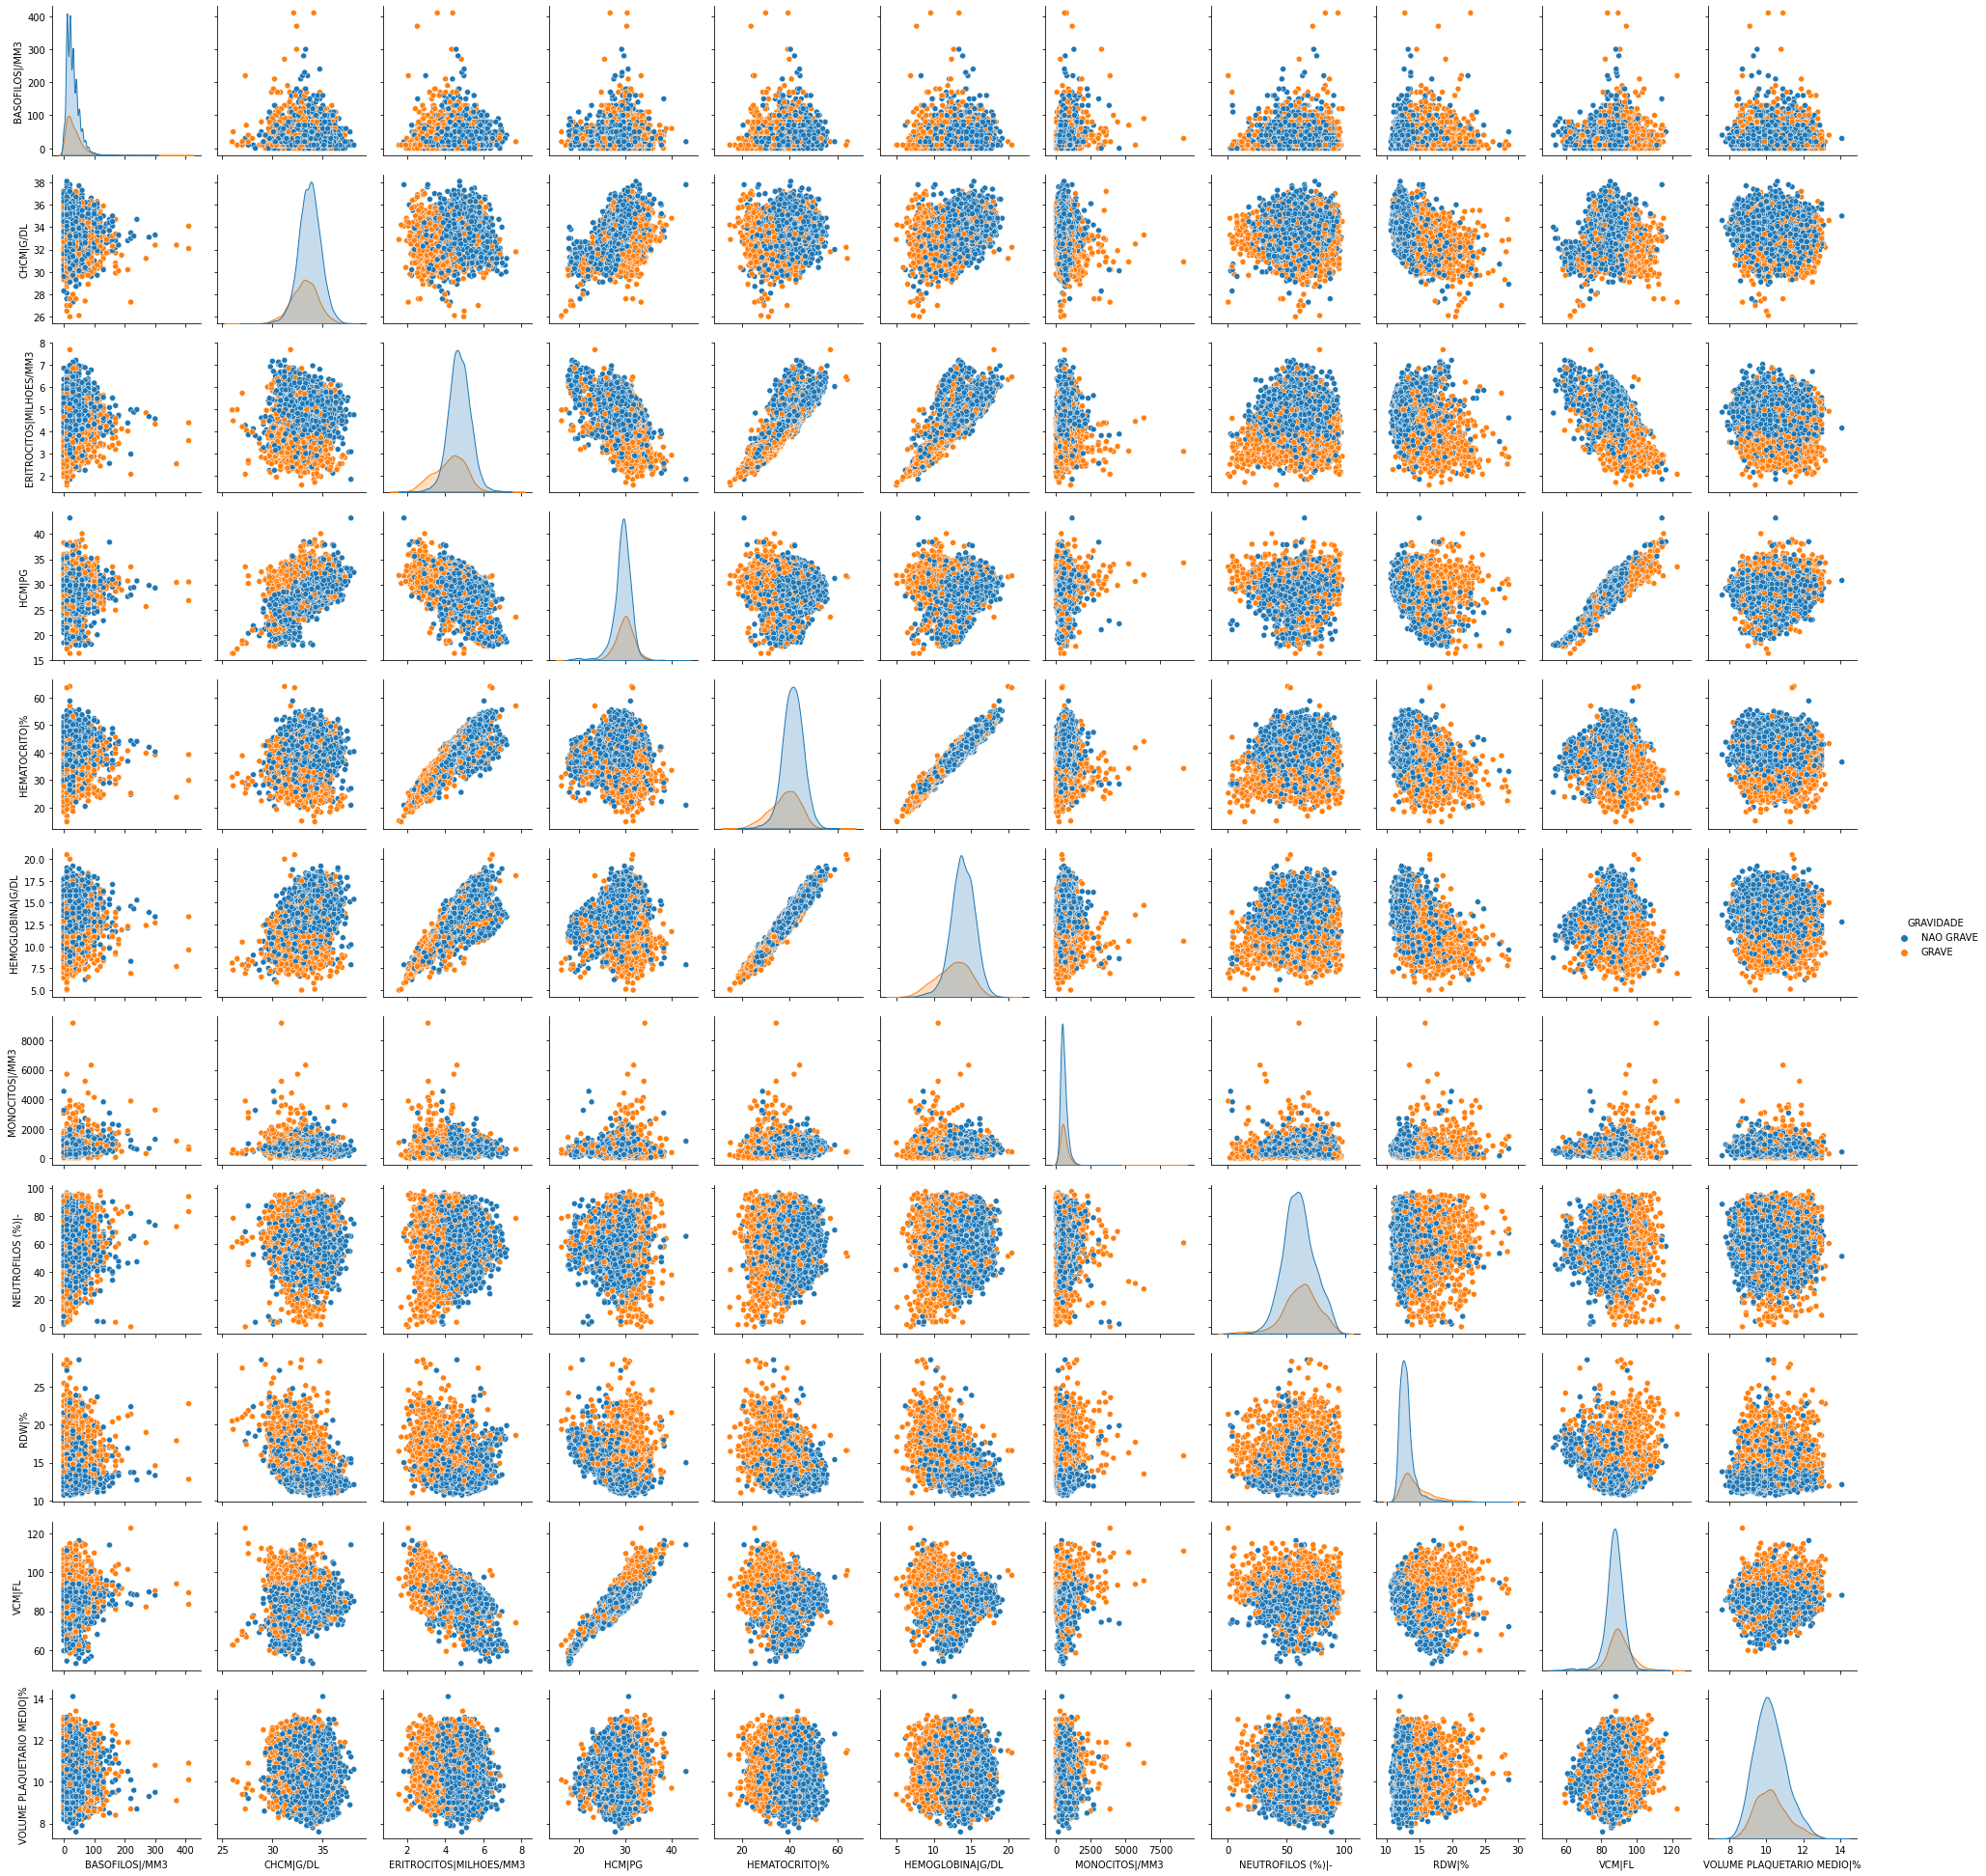

In [ ]:
sns.pairplot(df_am_explo_1, hue="GRAVIDADE")


In [ ]:
import seaborn as sns
import math
import datetime as dt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, SelectPercentile
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
d_2 = {'GRAVE' : 1, 'NAO GRAVE':0}
df_am_ajustado['GRAVIDADE'] = df_am_ajustado['GRAVIDADE'].map(d_2) #colocando 0 e 1 na coluna target
df_am_ajustado.head()

ID_PACIENTE                    ID_ATENDIMENTO  \
0  00017961865C4F766FDBB3CD8FE0BFB0  B57529234B6132E278264F273ADB99DC   
1  0003B368F65004E14332CD44BEE6E600  1E774FD413636840E7CAAE47817F8120   
2  00293E8E4B5FE4DABA62131274B3685A  D952F4143E2CB3BA555494DB846562E3   
3  00293E8E4B5FE4DABA62131274B3685A  DC2838FE32B8C868F82E723DABC030B3   
4  00293E8E4B5FE4DABA62131274B3685A  ECC8CF9469B0EAE7E74B5803C5413CB9   

   IC_SEXO  DIAS_HOSPITAL  GRAVIDADE  IDADE "ID_PACIENTE"  BASOFILOS|/MM3  \
0        1              0        NaN     55   ID_PACIENTE            40.0   
1        0              0        NaN     54   ID_PACIENTE            10.0   
2        0              0        NaN     74   ID_PACIENTE            30.0   
3        0              0        NaN     74   ID_PACIENTE            20.0   
4        0              0        NaN     74   ID_PACIENTE            10.0   

   BASOFILOS (%)|-  CHCM|G/DL  ...  LINFOCITOS|/MM3  LINFOCITOS (%)|-  \
0              0.6       34.5  ...           1000.0              15.5   
1              0.2       32.8  ...           1150.0              26.2   
2              0.2       33.7  ...            730.0               5.5   
3              0.5       33.9  ...            870.0              22.5   
4              0.1       34.1  ...            510.0               6.8   

   MONOCITOS|/MM3  MONOCITOS (%)|-  NEUTROFILOS|/MM3  NEUTROFILOS (%)|-  \
0           320.0              5.0            5020.0               78.0   
1           570.0             13.0            2660.0               60.6   
2           650.0              4.9           11880.0               89.3   
3           610.0             15.8            2360.0               60.9   
4           630.0              8.4            6340.0               84.7   

   PLAQUETAS|/MM3  RDW|%  VCM|FL  VOLUME PLAQUETARIO MEDIO|%  
0        176000.0   13.1    86.0                         9.8  
1        227000.0   14.1    92.7                         9.8  
2        279000.0   13.6    77.4                        10.3  
3        182000.0   13.6    78.6                        11.1  
4        188000.0   13.9    78.0                        10.5  

[5 rows x 27 columns]

In [ ]:
#NORMALIZAÇÃO

from sklearn import preprocessing
sirio_projeto = df_am_ajustado.drop(columns=['ID_PACIENTE', 'ID_ATENDIMENTO'])

In [ ]:
sirio_projeto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12703 entries, 0 to 12703
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IC_SEXO                     12703 non-null  int64  
 1   DIAS_HOSPITAL               12703 non-null  int64  
 2   GRAVIDADE                   12703 non-null  int64  
 3   IDADE                       12703 non-null  int64  
 4   "ID_PACIENTE"               12703 non-null  object 
 5   BASOFILOS|/MM3              12686 non-null  float64
 6   BASOFILOS (%)|-             12678 non-null  float64
 7   CHCM|G/DL                   12703 non-null  float64
 8   EOSINOFILOS|/MM3            12686 non-null  float64
 9   EOSINOFILOS (%)|-           12678 non-null  float64
 10  ERITROCITOS|MILHOES/MM3     12703 non-null  float64
 11  HCM|PG                      12703 non-null  float64
 12  HEMATOCRITO|%               12703 non-null  float64
 13  HEMOGLOBINA|G/DL            127

In [ ]:
sirio_projeto=sirio_projeto.drop(sirio_projeto.columns[[4, 4]], axis=1)


In [ ]:
sirio_projeto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12703 entries, 0 to 12703
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IC_SEXO                     12703 non-null  int64  
 1   DIAS_HOSPITAL               12703 non-null  int64  
 2   GRAVIDADE                   12703 non-null  int64  
 3   IDADE                       12703 non-null  int64  
 4   BASOFILOS|/MM3              12686 non-null  float64
 5   BASOFILOS (%)|-             12678 non-null  float64
 6   CHCM|G/DL                   12703 non-null  float64
 7   EOSINOFILOS|/MM3            12686 non-null  float64
 8   EOSINOFILOS (%)|-           12678 non-null  float64
 9   ERITROCITOS|MILHOES/MM3     12703 non-null  float64
 10  HCM|PG                      12703 non-null  float64
 11  HEMATOCRITO|%               12703 non-null  float64
 12  HEMOGLOBINA|G/DL            12703 non-null  float64
 13  LEUCOCITOS|/MM3             127

In [ ]:
cols = sirio_projeto.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(sirio_projeto)
novos_dados = pd.DataFrame(np_scaled, columns = cols)
novos_dados = novos_dados.fillna(novos_dados.median())
novos_dados

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(novos_dados.drop(['GRAVIDADE'], axis=1), novos_dados['GRAVIDADE'],
                                                    test_size = 0.3, random_state=0)
print('Dados de treino {}'.format(X_train.shape))
print('\n')
print("Dados de teste{}". format(X_test.shape))

Dados de treino (8892, 23)


Dados de teste(3811, 23)


In [ ]:
#VALIDAÇÃO CRUZADA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer

In [ ]:
# Semente aleatória para reproducibilidade dos experimentos (reproducão dos experimentos)
seed = 20

In [ ]:
scorer = make_scorer(accuracy_score) # Teste outras

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)


gscv = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

algorithms = {
    # testar sem hiperparâmetros
    'kNN':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler(feature_range=(0, 1))),
            ('selector', VarianceThreshold()),
            ('knn', KNeighborsClassifier())]), 
        param_grid={
            'selector__threshold': [0, 0.01, 0.02, 0.03],
            'knn__n_neighbors': [1, 3, 5],
            'knn__p': [1, 2],
        },
        scoring=scorer,
        cv=gscv),
    'tree':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(random_state=seed))]), 
        param_grid={
            'tree__max_depth': [5, 10, 20],
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv),
    'bigtree':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=seed))]), 
        param_grid={
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv),
    'svmlinear': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA()),
            ('svm', SVC(kernel='linear', random_state=seed))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
        },
        scoring=scorer,
        cv=gscv),
    'svmrbf': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA(random_state=seed)),
            ('svm', SVC(kernel='rbf', random_state=seed))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
            'svm__gamma': [0.1, 1.0, 2.0],
        },
        scoring=scorer,
        cv=gscv),
}

In [ ]:
from sklearn.model_selection import cross_val_score

result = {}
for alg, clf in algorithms.items():
  result[alg] = cross_val_score(clf, X_train, y_train, cv=cv)

result = pd.DataFrame.from_dict(result)

In [ ]:
print(result)

        kNN      tree   bigtree  svmlinear    svmrbf
0  0.795506  0.785393  0.722472   0.788764  0.807865
1  0.829213  0.811236  0.717978   0.788764  0.807865
2  0.825647  0.790776  0.717660   0.785152  0.803150
3  0.827897  0.817773  0.726659   0.798650  0.820022
4  0.817773  0.789651  0.717660   0.791901  0.807649
5  0.805399  0.805399  0.739033   0.788526  0.812148
6  0.821147  0.798650  0.713161   0.790776  0.806524
7  0.817773  0.795276  0.714286   0.796400  0.812148
8  0.790776  0.791901  0.716535   0.780652  0.797525
9  0.816648  0.781777  0.714286   0.791901  0.818898


In [ ]:
result.apply(lambda x: "{:.2f} ± {:.2f}".format(x.mean(), x.std()))

kNN          0.81 ± 0.01
tree         0.80 ± 0.01
bigtree      0.72 ± 0.01
svmlinear    0.79 ± 0.01
svmrbf       0.81 ± 0.01
dtype: object

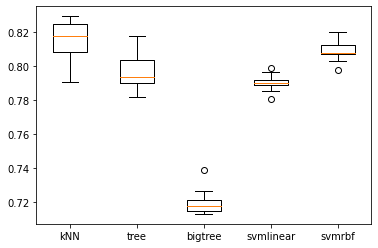

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot([ scores for alg, scores in result.iteritems() ])
plt.xticks(1 + np.arange(result.shape[1]), result.columns)
plt.show()

COMPARANDO DESEPENHO

In [ ]:
from scipy.stats import wilcoxon

In [ ]:
# Comparar dois algoritmos:

wilcoxon(result.kNN, result.svmlinear)

WilcoxonResult(statistic=0.0, pvalue=0.005062032126267864)

F1-SCORE

In [ ]:
scorer = make_scorer(accuracy_score) # Teste outras

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)


gscv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

algorithmo = {
    # testar sem hiperparâmetros
    'kNN':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler(feature_range=(0, 1))),
            ('selector', VarianceThreshold()),
            ('knn', KNeighborsClassifier())]), 
        param_grid={
            'selector__threshold': [0, 0.01, 0.02, 0.03],
            'knn__n_neighbors': [1, 3, 5],
            'knn__p': [1, 2],
        },
        scoring='f1',
        cv=gscv),
    'tree':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(random_state=seed))]), 
        param_grid={
            'tree__max_depth': [5, 10, 20],
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring='f1',
        cv=gscv),
    'bigtree':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=seed))]), 
        param_grid={
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring='f1',
        cv=gscv),
    'svmlinear': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA()),
            ('svm', SVC(kernel='linear', random_state=seed))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
        },
        scoring='f1',
        cv=gscv),
    'svmrbf': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA(random_state=seed)),
            ('svm', SVC(kernel='rbf', random_state=seed))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
            'svm__gamma': [0.1, 1.0, 2.0],
        },
        scoring='f1',
        cv=gscv),
}

In [ ]:
from sklearn.model_selection import cross_val_score

resultes = {}
for alg, clf in algorithmo.items():
  resultes[alg] = cross_val_score(clf, X_train, y_train, cv=cv)

resultes = pd.DataFrame.from_dict(resultes)
print(resultes)

        kNN      tree   bigtree  svmlinear    svmrbf
0  0.587963  0.559441  0.520388   0.462857  0.535065
1  0.602094  0.570093  0.499002   0.433735  0.554945
2  0.621027  0.537313  0.500994   0.460227  0.525469
3  0.607710  0.562648  0.536122   0.498599  0.586118
4  0.605923  0.491400  0.482474   0.447761  0.523677
5  0.572840  0.580046  0.532258   0.456647  0.555256
6  0.598639  0.472826  0.457380   0.432927  0.527473
7  0.611111  0.554324  0.505010   0.481375  0.561680
8  0.538813  0.500000  0.493976   0.424779  0.502762
9  0.610979  0.514019  0.515267   0.466859  0.575198


In [ ]:
resultes.apply(lambda x: "{:.2f} ± {:.2f}".format(x.mean(), x.std())) #bigtree é arvore de decisão

kNN          0.60 ± 0.02
tree         0.53 ± 0.04
bigtree      0.50 ± 0.02
svmlinear    0.46 ± 0.02
svmrbf       0.54 ± 0.03
dtype: object